In [1]:
import pandas as pd

# Load each dataset
links = pd.read_csv('links.csv')  # contains columns movieId, imdbId, tmdbId
movies = pd.read_csv('movies.csv')  # contains columns movieId, title, genres
ratings = pd.read_csv('ratings.csv')  # contains columns userId, movieId, rating, rating_timestamp
tags = pd.read_csv('tags.csv')  # contains columns userId, movieId, tag, tag_timestamp

# Display the shape and columns of each dataset for reference
print("Links dataset shape:", links.shape)
print("Movies dataset shape:", movies.shape)
print("Ratings dataset shape:", ratings.shape)
print("Tags dataset shape:", tags.shape)

# Perform full outer joins

# Step 1: Join ratings with links on movieId
joined_data = pd.merge(ratings, links, on='movieId', how='outer')

# Step 2: Join with movies on movieId
joined_data = pd.merge(joined_data, movies, on='movieId', how='outer')

# Step 3: Join with tags on userId and movieId
joined_data = pd.merge(joined_data, tags, on=['userId', 'movieId'], how='outer')

# Display the joined dataset
print("\nJoined dataset shape:", joined_data.shape)
print(joined_data.head())

# Optionally, save the joined dataset to a new CSV file
joined_data.to_csv('joined_data.csv', index=False)


Links dataset shape: (9742, 3)
Movies dataset shape: (9742, 3)
Ratings dataset shape: (100836, 4)
Tags dataset shape: (3683, 4)

Joined dataset shape: (102902, 10)
   userId  movieId  rating  rating_timestamp    imdbId   tmdbId  \
0     1.0        1     4.0       964982703.0  114709.0    862.0   
1     1.0        3     4.0       964981247.0  113228.0  15602.0   
2     1.0        6     4.0       964982224.0  113277.0    949.0   
3     1.0       47     5.0       964983815.0  114369.0    807.0   
4     1.0       50     5.0       964982931.0  114814.0    629.0   

                         title                                       genres  \
0             Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy   
1      Grumpier Old Men (1995)                               Comedy|Romance   
2                  Heat (1995)                        Action|Crime|Thriller   
3  Seven (a.k.a. Se7en) (1995)                             Mystery|Thriller   
4   Usual Suspects, The (1995)        

In [2]:
joined_data.isnull().sum()

userId                 18
movieId                 0
rating                225
rating_timestamp      225
imdbId                207
tmdbId                220
title                 207
genres                207
tag                 99219
tag_timestamp       99219
dtype: int64

In [5]:
# Basic Structure of the Data
print("Basic Information:")
print(joined_data.info())
print("\n")

Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102902 entries, 0 to 102901
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   userId            102884 non-null  float64
 1   movieId           102902 non-null  int64  
 2   rating            102677 non-null  float64
 3   rating_timestamp  102677 non-null  float64
 4   imdbId            102695 non-null  float64
 5   tmdbId            102682 non-null  float64
 6   title             102695 non-null  object 
 7   genres            102695 non-null  object 
 8   tag               3683 non-null    object 
 9   tag_timestamp     3683 non-null    float64
dtypes: float64(6), int64(1), object(3)
memory usage: 7.9+ MB
None




In [7]:
print("First 5 Rows:")
print(joined_data.head())
print("\n")

print("Summary Statistics:")
print(joined_data.describe(include='all'))
print("\n")

First 5 Rows:
   userId  movieId  rating  rating_timestamp    imdbId   tmdbId  \
0     1.0        1     4.0       964982703.0  114709.0    862.0   
1     1.0        3     4.0       964981247.0  113228.0  15602.0   
2     1.0        6     4.0       964982224.0  113277.0    949.0   
3     1.0       47     5.0       964983815.0  114369.0    807.0   
4     1.0       50     5.0       964982931.0  114814.0    629.0   

                         title                                       genres  \
0             Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy   
1      Grumpier Old Men (1995)                               Comedy|Romance   
2                  Heat (1995)                        Action|Crime|Thriller   
3  Seven (a.k.a. Se7en) (1995)                             Mystery|Thriller   
4   Usual Suspects, The (1995)                       Crime|Mystery|Thriller   

   tag  tag_timestamp  
0  NaN            NaN  
1  NaN            NaN  
2  NaN            NaN  
3  NaN      

In [9]:
# Load your dataset
joined_data = pd.read_csv('joined_data.csv')  # Use the appropriate file name

# 1. Check for missing values
missing_values = joined_data.isnull().sum()
missing_percentage = (missing_values / len(joined_data)) * 100

# Create a DataFrame for better visualization
missing_data_summary = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})

# Display columns with missing values
print("Missing Data Summary:")
print(missing_data_summary[missing_data_summary['Missing Values'] > 0])

Missing Data Summary:
                  Missing Values  Percentage
userId                        18    0.017492
rating                       225    0.218655
rating_timestamp             225    0.218655
imdbId                       207    0.201162
tmdbId                       220    0.213796
title                        207    0.201162
genres                       207    0.201162
tag                        99219   96.420866
tag_timestamp              99219   96.420866


In [11]:
# Count the number of rows in the 'movieId' column, including duplicates
num_rows_movieId = joined_data['movieId'].count()

# Count the number of rows in the 'userId' column, including duplicates
num_rows_userId = joined_data['userId'].count()

# Print the results
print(f"Number of rows in 'movieId' column (including duplicates): {num_rows_movieId}")
print(f"Number of rows in 'userId' column (including duplicates): {num_rows_userId}")

Number of rows in 'movieId' column (including duplicates): 102902
Number of rows in 'userId' column (including duplicates): 102884


In [13]:
import pandas as pd

# Load your dataset (assuming it's already been joined)
joined_data = pd.read_csv('joined_data.csv')  # Use your actual joined dataset file name

# Display the original columns
print("Original columns in the dataset:")
print(joined_data.columns)

# Drop the 'tag' and 'tag_timestamp' columns
joined_data.drop(columns=['tag', 'tag_timestamp'], inplace=True)

# Display the updated columns to confirm the drop
print("\nUpdated columns after dropping 'tag' and 'tag_timestamp':")
print(joined_data.columns)

# Optionally, save the updated DataFrame to a new CSV file
joined_data.to_csv('joined_data_cleaned.csv', index=False)


Original columns in the dataset:
Index(['userId', 'movieId', 'rating', 'rating_timestamp', 'imdbId', 'tmdbId',
       'title', 'genres', 'tag', 'tag_timestamp'],
      dtype='object')

Updated columns after dropping 'tag' and 'tag_timestamp':
Index(['userId', 'movieId', 'rating', 'rating_timestamp', 'imdbId', 'tmdbId',
       'title', 'genres'],
      dtype='object')


In [15]:
import pandas as pd

# Load your dataset (assuming it's already been joined)
joined_data = pd.read_csv('joined_data_cleaned.csv')  # Use your actual joined dataset file name

# Step 1: Identify duplicates
duplicates = joined_data[joined_data.duplicated(subset=['userId', 'movieId'], keep=False)]

# Display the number of duplicate (userId, movieId) pairs
num_duplicates = duplicates.shape[0]
print(f'Number of duplicate (userId, movieId) pairs: {num_duplicates}')

# Display the duplicates for review
print("\nDuplicate Entries:")
print(duplicates)

# Step 2: Aggregate duplicates by taking the mean of the ratings
joined_data = joined_data.groupby(['userId', 'movieId'], as_index=False).agg({
    'rating': 'mean',  # or you could use 'last', 'first', etc.
    'rating_timestamp': 'max',  # Keeping the most recent timestamp
    'imdbId': 'first',  # Keep the first imdbId
    'tmdbId': 'first',  # Keep the first tmdbId
    'title': 'first',   # Keep the first title
    'genres': 'first'   # Keep the first genres
})

# Display the updated dataset shape
print(f'\nUpdated dataset shape: {joined_data.shape}')

# Optionally, save the updated DataFrame to a new CSV file
joined_data.to_csv('joined_data_no_duplicates.csv', index=False)


Number of duplicate (userId, movieId) pairs: 2510

Duplicate Entries:
        userId  movieId  rating  rating_timestamp     imdbId   tmdbId  \
241        2.0    60756     5.0      1.445715e+09   838283.0  12133.0   
242        2.0    60756     5.0      1.445715e+09   838283.0  12133.0   
243        2.0    60756     5.0      1.445715e+09   838283.0  12133.0   
252        2.0    89774     5.0      1.445715e+09  1291584.0  59440.0   
253        2.0    89774     5.0      1.445715e+09  1291584.0  59440.0   
...        ...      ...     ...               ...        ...      ...   
95588    599.0     2959     5.0      1.498457e+09   137523.0    550.0   
95589    599.0     2959     5.0      1.498457e+09   137523.0    550.0   
95590    599.0     2959     5.0      1.498457e+09   137523.0    550.0   
101760   610.0     3265     5.0      1.479542e+09   104684.0  11782.0   
101761   610.0     3265     5.0      1.479542e+09   104684.0  11782.0   

                                        title        

In [17]:
import pandas as pd

# Load the cleaned dataset
joined_data = pd.read_csv('joined_data_no_duplicates.csv')  # Use your actual cleaned dataset file name

# Check for duplicates based on 'userId' and 'movieId'
duplicates = joined_data[joined_data.duplicated(subset=['userId', 'movieId'], keep=False)]

# Check the number of duplicates
num_remaining_duplicates = duplicates.shape[0]
if num_remaining_duplicates > 0:
    print(f'Remaining number of duplicate (userId, movieId) pairs: {num_remaining_duplicates}')
    print("\nRemaining Duplicate Entries:")
    print(duplicates)
else:
    print("No remaining duplicates found.")


No remaining duplicates found.


In [19]:
import pandas as pd

# Load the cleaned dataset
joined_data = pd.read_csv('joined_data_no_duplicates.csv')  # Use your actual cleaned dataset file name

# Check for missing values
missing_values = joined_data.isnull().sum()

# Create a DataFrame to summarize missing values, including all columns
missing_summary = pd.DataFrame({
    'Column Name': missing_values.index,
    'Missing Values': missing_values.values,
    'Percentage': (missing_values / len(joined_data)) * 100
})

# Display the summary of missing values
print("Missing Values Summary:")
print(missing_summary)

# Optionally, display the total number of missing values
total_missing = missing_summary['Missing Values'].sum()
print(f"\nTotal Missing Values in the Dataset: {total_missing}")


Missing Values Summary:
                       Column Name  Missing Values  Percentage
userId                      userId               0    0.000000
movieId                    movieId               0    0.000000
rating                      rating             140    0.138647
rating_timestamp  rating_timestamp             140    0.138647
imdbId                      imdbId             140    0.138647
tmdbId                      tmdbId             153    0.151521
title                        title             140    0.138647
genres                      genres             140    0.138647

Total Missing Values in the Dataset: 853


In [21]:
joined_data.nunique()

userId                610
movieId              9742
rating                 10
rating_timestamp    85043
imdbId               9724
tmdbId               9715
title                9719
genres                951
dtype: int64

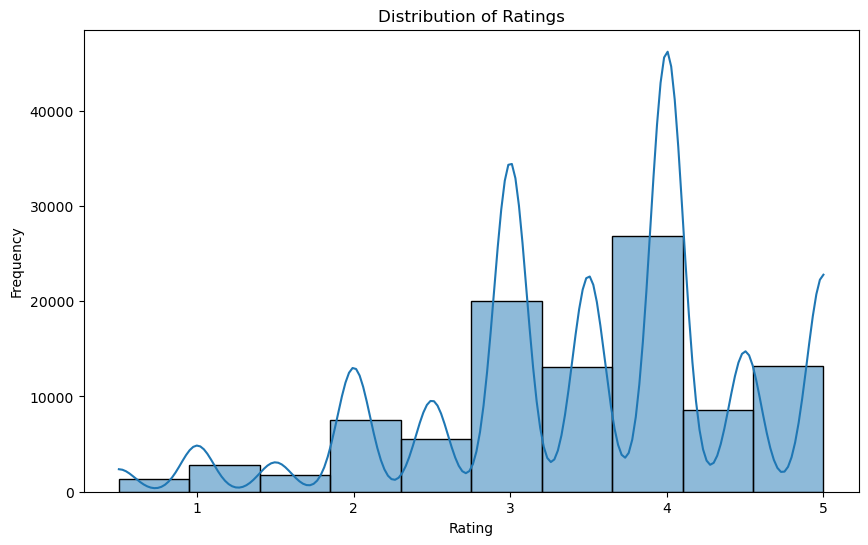

Frequency of Ratings:
   Rating  Frequency
0     0.5       1370
1     1.0       2811
2     1.5       1791
3     2.0       7551
4     2.5       5550
5     3.0      20047
6     3.5      13136
7     4.0      26818
8     4.5       8551
9     5.0      13211


In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'joined_data' is already defined and loaded as a DataFrame

# Distribution of Ratings - Histogram Plot
plt.figure(figsize=(10, 6))
sns.histplot(joined_data['rating'].dropna(), bins=10, kde=True)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

# Data Table: Frequency of Ratings
rating_counts = joined_data['rating'].value_counts().sort_index().reset_index()
rating_counts.columns = ['Rating', 'Frequency']

# Display the Frequency Table
print("Frequency of Ratings:")
print(rating_counts)


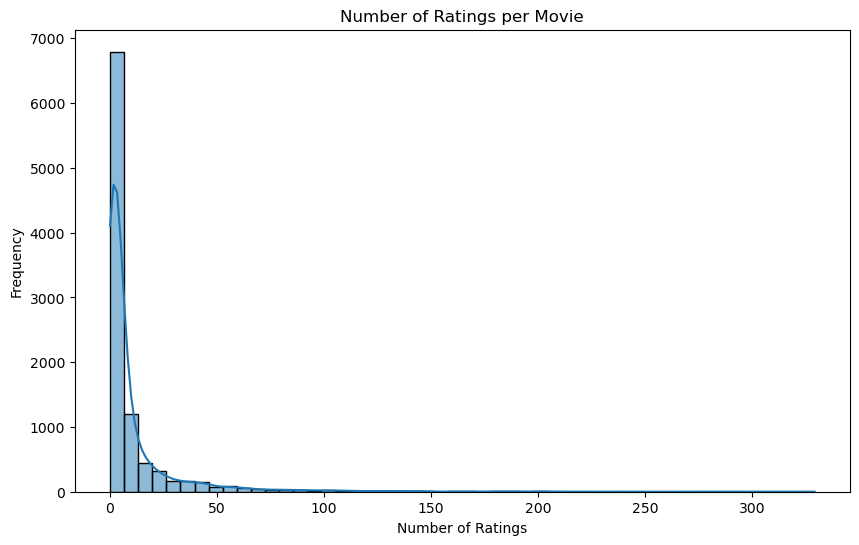

Number of Ratings per Movie:
   MovieID  Number of Ratings
0      356                329
1      318                317
2      296                307
3      593                279
4     2571                278
5      260                251
6      480                238
7      110                237
8      589                224
9      527                220


In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'joined_data' is already defined and loaded as a DataFrame

# Number of Ratings per Movie - Histogram Plot
ratings_per_movie = joined_data.groupby('movieId')['rating'].count().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.histplot(ratings_per_movie, bins=50, kde=True)
plt.title('Number of Ratings per Movie')
plt.xlabel('Number of Ratings')
plt.ylabel('Frequency')
plt.show()

# Data Table: Number of Ratings per Movie
ratings_table = ratings_per_movie.reset_index()
ratings_table.columns = ['MovieID', 'Number of Ratings']

# Display the Data Table
print("Number of Ratings per Movie:")
print(ratings_table.head(10))  # Display the top 10 movies with the most ratings


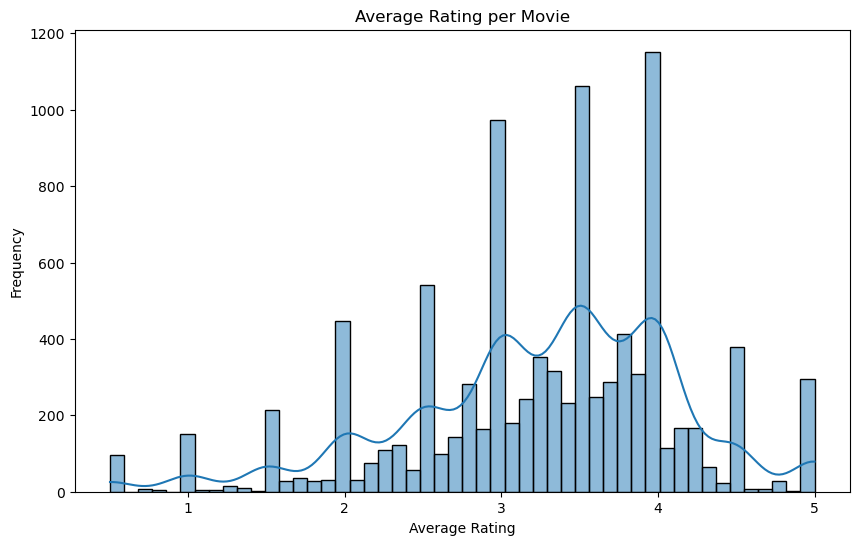

Average Rating per Movie:
    MovieID  Average Rating
0     88448             5.0
1    100556             5.0
2    143031             5.0
3    143511             5.0
4    143559             5.0
5      6201             5.0
6    102217             5.0
7    102084             5.0
8      6192             5.0
9    145994             5.0
10   100906             5.0
11   146662             5.0
12    99636             5.0
13    31522             5.0
14   146684             5.0
15   147196             5.0
16   147250             5.0
17   147286             5.0
18   147300             5.0
19   147326             5.0
20   147328             5.0
21    67618             5.0
22     4495             5.0
23   103602             5.0
24    64501             5.0
25    64499             5.0
26   140133             5.0
27   140265             5.0
28     6408             5.0
29     6402             5.0


In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'joined_data' is already defined and loaded as a DataFrame

# Average Rating per Movie - Histogram Plot
avg_rating_per_movie = joined_data.groupby('movieId')['rating'].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.histplot(avg_rating_per_movie, bins=50, kde=True)
plt.title('Average Rating per Movie')
plt.xlabel('Average Rating')
plt.ylabel('Frequency')
plt.show()

# Data Table: Average Rating per Movie
avg_rating_table = avg_rating_per_movie.reset_index()
avg_rating_table.columns = ['MovieID', 'Average Rating']

# Display the Data Table
print("Average Rating per Movie:")
print(avg_rating_table.head(30))  # Display the top 10 movies with the highest average rating


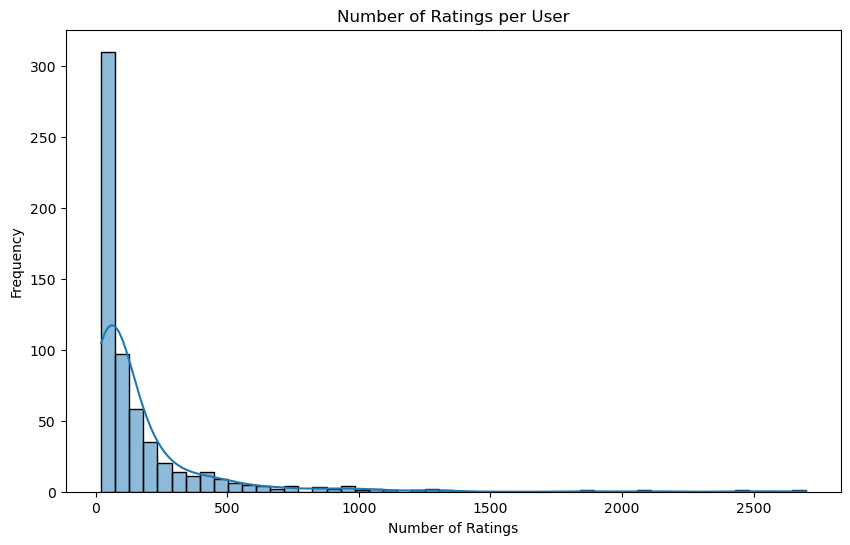

Number of Ratings per User:
   UserID  Number of Ratings
0   414.0               2698
1   599.0               2478
2   474.0               2108
3   448.0               1864
4   274.0               1346
5   610.0               1302
6    68.0               1260
7   380.0               1218
8   606.0               1115
9   288.0               1055


In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'joined_data' is already defined and loaded as a DataFrame

# Number of Ratings per User - Histogram Plot
ratings_per_user = joined_data.groupby('userId')['rating'].count().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.histplot(ratings_per_user, bins=50, kde=True)
plt.title('Number of Ratings per User')
plt.xlabel('Number of Ratings')
plt.ylabel('Frequency')
plt.show()

# Data Table: Number of Ratings per User
ratings_per_user_table = ratings_per_user.reset_index()
ratings_per_user_table.columns = ['UserID', 'Number of Ratings']

# Display the Data Table
print("Number of Ratings per User:")
print(ratings_per_user_table.head(10))  # Display the top 10 users with the most ratings


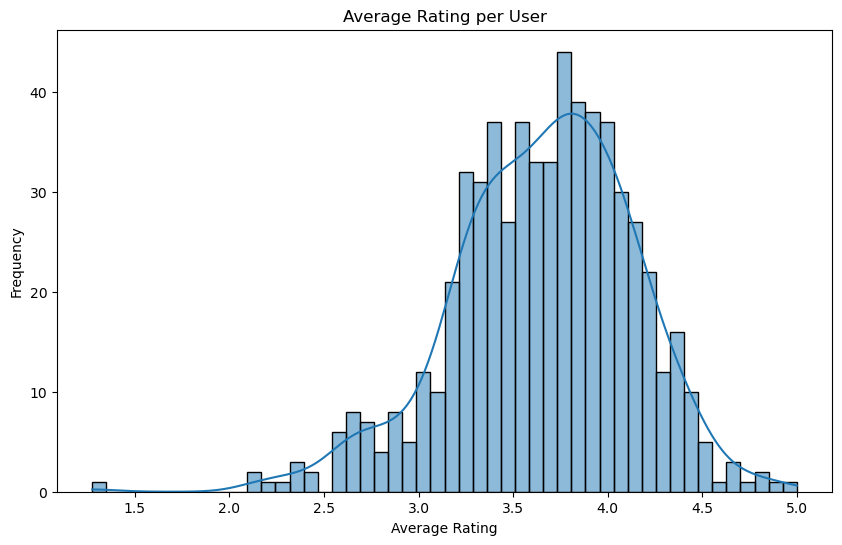

Average Rating per User:
   UserID  Average Rating
0    53.0        5.000000
1   251.0        4.869565
2   515.0        4.846154
3    25.0        4.807692
4    30.0        4.735294
5   523.0        4.693333
6   348.0        4.672727
7   171.0        4.634146
8   452.0        4.556931
9    43.0        4.552632


In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'joined_data' is already defined and loaded as a DataFrame

# Average Rating per User - Histogram Plot
avg_rating_per_user = joined_data.groupby('userId')['rating'].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.histplot(avg_rating_per_user, bins=50, kde=True)
plt.title('Average Rating per User')
plt.xlabel('Average Rating')
plt.ylabel('Frequency')
plt.show()

# Data Table: Average Rating per User
avg_rating_per_user_table = avg_rating_per_user.reset_index()
avg_rating_per_user_table.columns = ['UserID', 'Average Rating']

# Display the Data Table
print("Average Rating per User:")
print(avg_rating_per_user_table.head(10))  # Display the top 10 users with the highest average rating


In [37]:
joined_data

,userId,movieId,rating,rating_timestamp,imdbId,tmdbId,title,genres
0,1.0,1,4.0,9.649827e+08,114709.0,862.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1.0,3,4.0,9.649812e+08,113228.0,15602.0,Grumpier Old Men (1995),Comedy|Romance
2,1.0,6,4.0,9.649822e+08,113277.0,949.0,Heat (1995),Action|Crime|Thriller
3,1.0,47,5.0,9.649838e+08,114369.0,807.0,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1.0,50,5.0,9.649829e+08,114814.0,629.0,"Usual Suspects, The (1995)",Crime|Mystery|Thriller
...,...,...,...,...,...,...,...,...
100971,610.0,166534,4.0,1.493848e+09,4972582.0,381288.0,Split (2017),Drama|Horror|Thriller
100972,610.0,168248,5.0,1.493850e+09,4425200.0,324552.0,John Wick: Chapter Two (2017),Action|Crime|Thriller
100973,610.0,168250,5.0,1.494273e+09,5052448.0,419430.0,Get Out (2017),Horror
100974,610.0,168252,5.0,1.493846e+09,3315342.0,263115.0,Logan (2017),Action|Sci-Fi


In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'joined_data' is already defined and loaded as a DataFrame

# Tag Frequency - Bar Plot
tag_frequency = joined_data['tag'].value_counts().head(20)
plt.figure(figsize=(12, 8))
sns.barplot(x=tag_frequency.values, y=tag_frequency.index, palette='viridis')
plt.title('Top 20 Tags')
plt.xlabel('Frequency')
plt.ylabel('Tag')
plt.show()

# Data Table: Top 20 Tags by Frequency
tag_frequency_table = tag_frequency.reset_index()
tag_frequency_table.columns = ['Tag', 'Frequency']

# Display the Data Table
print("Top 20 Tags by Frequency:")
print(tag_frequency_table)


KeyError: 'tag'

C:\Users\yuvas\AppData\Local\Temp\ipykernel_31548\4002438447.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='movieId', y='rating', data=subset_data, palette='Set3')


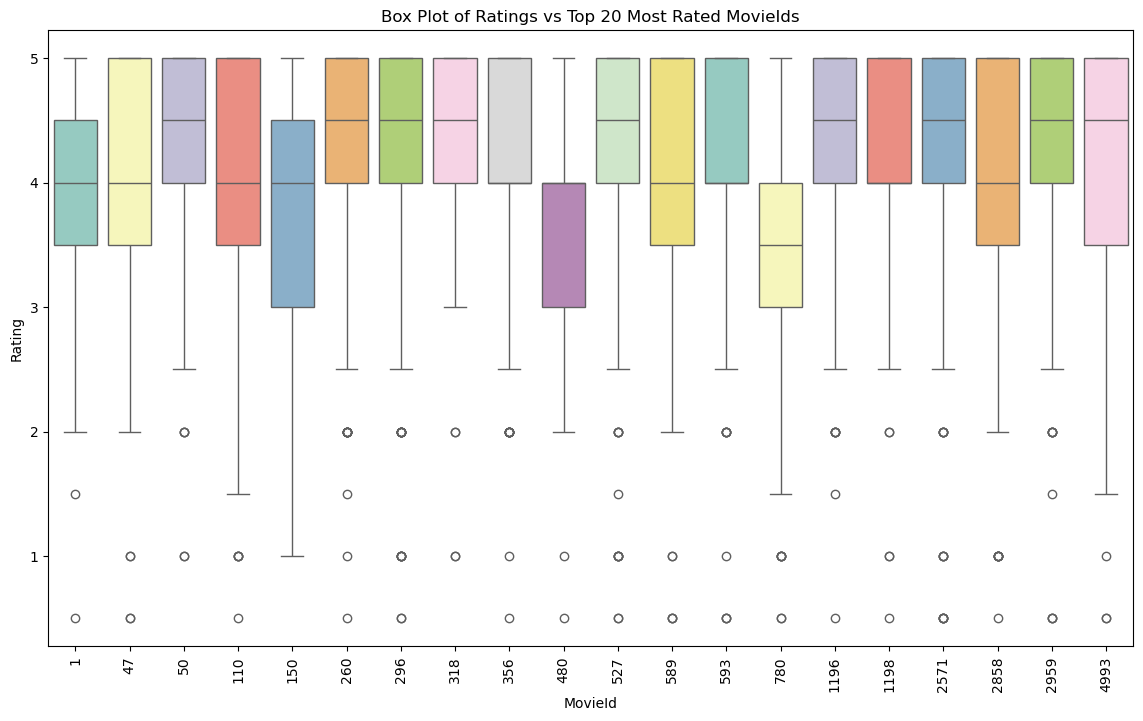

Summary Statistics for Ratings of Top 20 Most Rated Movies:
    MovieId  Count      Mean       Std  Min  25%  50%  75%  Max
0         1  215.0  3.920930  0.834859  0.5  3.5  4.0  4.5  5.0
1        47  203.0  3.975369  0.922429  0.5  3.5  4.0  5.0  5.0
2        50  204.0  4.237745  0.800921  1.0  4.0  4.5  5.0  5.0
3       110  237.0  4.031646  0.967726  0.5  3.5  4.0  5.0  5.0
4       150  201.0  3.845771  0.876695  1.0  3.0  4.0  4.5  5.0
5       260  251.0  4.231076  0.872004  0.5  4.0  4.5  5.0  5.0
6       296  307.0  4.197068  0.951997  0.5  4.0  4.5  5.0  5.0
7       318  317.0  4.429022  0.713019  1.0  4.0  4.5  5.0  5.0
8       356  329.0  4.164134  0.831244  0.5  4.0  4.0  5.0  5.0
9       480  238.0  3.750000  0.855301  0.5  3.0  4.0  4.0  5.0
10      527  220.0  4.225000  0.975996  0.5  4.0  4.5  5.0  5.0
11      589  224.0  3.970982  0.926833  0.5  3.5  4.0  5.0  5.0
12      593  279.0  4.161290  0.853983  0.5  4.0  4.0  5.0  5.0
13      780  202.0  3.445545  0.996014  0.5 

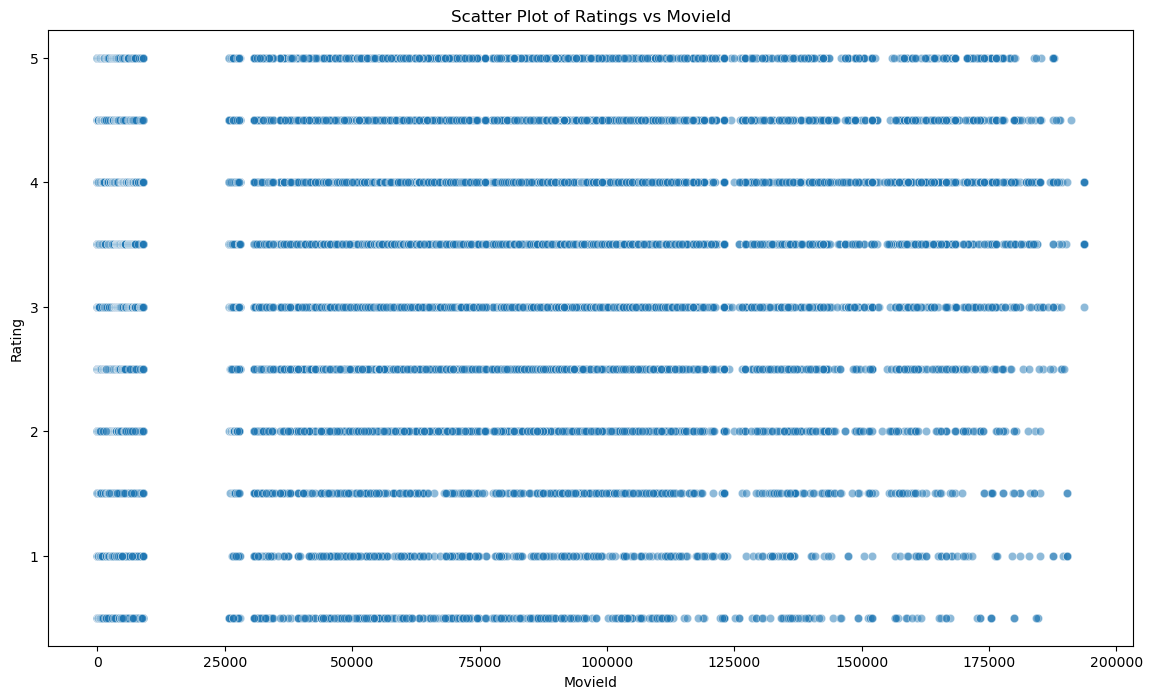

Sample of Ratings Data:
   movieId  rating
0      508     4.0
1      780     0.5
2     1006     2.0
3     1387     5.0
4     1704     3.0
5     2081     4.0
6     3715     4.0
7     4916     3.0
8    31260     3.5
9    32598     4.0


In [41]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'joined_data' is already defined and loaded as a DataFrame

# Box Plot of Ratings against MovieId (for better visualization of distribution)
subset_movie_ids = joined_data['movieId'].value_counts().head(20).index  # Top 20 most rated movieIds
subset_data = joined_data[joined_data['movieId'].isin(subset_movie_ids)]

plt.figure(figsize=(14, 8))
sns.boxplot(x='movieId', y='rating', data=subset_data, palette='Set3')
plt.title('Box Plot of Ratings vs Top 20 Most Rated MovieIds')
plt.xlabel('MovieId')
plt.ylabel('Rating')
plt.xticks(rotation=90)  # Rotate movieId labels for better readability
plt.show()

# Data Table: Summary Statistics for Ratings of Top 20 Most Rated Movies
ratings_summary_table = subset_data.groupby('movieId')['rating'].describe().reset_index()
ratings_summary_table.columns = ['MovieId', 'Count', 'Mean', 'Std', 'Min', '25%', '50%', '75%', 'Max']

print("Summary Statistics for Ratings of Top 20 Most Rated Movies:")
print(ratings_summary_table)

# Scatter Plot of Ratings against MovieId
plt.figure(figsize=(14, 8))
sns.scatterplot(x='movieId', y='rating', data=joined_data, alpha=0.5)
plt.title('Scatter Plot of Ratings vs MovieId')
plt.xlabel('MovieId')
plt.ylabel('Rating')
plt.show()

# Data Table: Sample of Ratings Data
sample_ratings_table = joined_data[['movieId', 'rating']].sample(10).sort_values(by='movieId').reset_index(drop=True)

print("Sample of Ratings Data:")
print(sample_ratings_table)


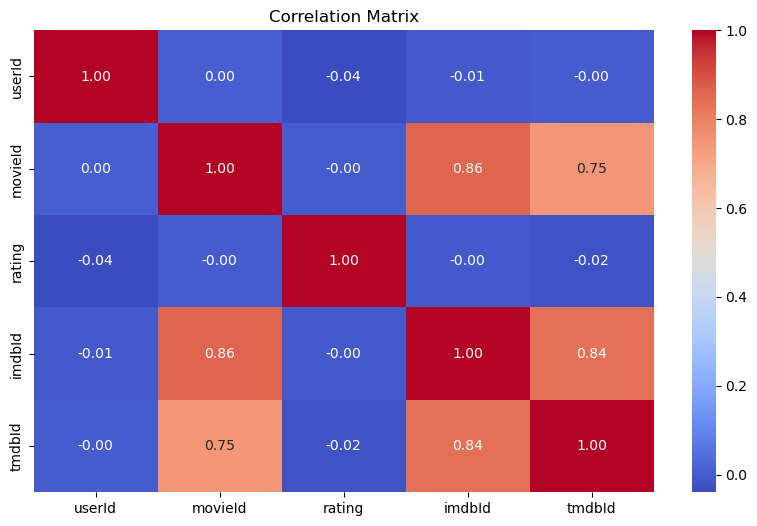

In [13]:
# Drop non-numeric columns explicitly
numeric_data = joined_data.drop(columns=['title', 'genres', 'tag', 'rating_timestamp', 'tag_timestamp'])

# Compute the correlation matrix
corr_matrix = numeric_data.corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


In [29]:
# Import necessary modules from scikit-surprise
from surprise import Dataset, Reader, SVD
from surprise.model_selection import train_test_split
from surprise import accuracy

In [31]:
joined_data.nunique()

userId                610
movieId              9742
rating                 10
rating_timestamp    85043
imdbId               9724
tmdbId               9715
title                9719
genres                951
dtype: int64

In [87]:
import pandas as pd

# Load the dataset
joined_data = pd.read_csv(r'C:\Users\yuvas\Downloads\joined_data.csv')  # Use your actual cleaned dataset file name
joined_data = joined_data[['userId','movieId','rating']]
# Display the original data
print("Original Data:")
print(joined_data.head())

# Drop rows where userId is NaN
joined_data_cleaned = joined_data.dropna(subset=['userId'])

# Display the cleaned data
print("\nCleaned Data (after dropping NaN userId):")
print(joined_data_cleaned.head())

# Create a user-item matrix
user_item_matrix = joined_data_cleaned.pivot(index='userId', columns='movieId', values='rating')

# Display the user-item matrix
print("\nUser-Item Matrix:")
print(user_item_matrix)




Original Data:
   userId  movieId  rating
0     1.0        1     4.0
1     5.0        1     4.0
2     7.0        1     4.5
3    15.0        1     2.5
4    17.0        1     4.5

Cleaned Data (after dropping NaN userId):
   userId  movieId  rating
0     1.0        1     4.0
1     5.0        1     4.0
2     7.0        1     4.5
3    15.0        1     2.5
4    17.0        1     4.5

User-Item Matrix:
movieId  1       2       3       4       5       6       7       8       \
userId                                                                    
1.0         4.0     NaN     4.0     NaN     NaN     4.0     NaN     NaN   
2.0         NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
3.0         NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
4.0         NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
5.0         4.0     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
...         ...     ...     ...     ...     ...     ...     ...     ...   

In [89]:
user_item_matrix.shape

(610, 9742)

In [91]:

# Calculate the total number of entries in the matrix
total_entries = user_item_matrix.size

# Count the number of missing values in the matrix
missing_values_count = user_item_matrix.isnull().sum().sum()

# Calculate the percentage of missing values
missing_percentage = (missing_values_count / total_entries) * 100

# Display the percentage of missing values
print(f"Percentage of Missing Values: {missing_percentage:.2f}%")




Percentage of Missing Values: 98.30%


<h2> Modelling -k </h2>

In [96]:
import pandas as pd
import numpy as np
from sklearn.decomposition import NMF
from sklearn.metrics import mean_squared_error

# Load the dataset
joined_data = pd.read_csv(r'C:\Users\yuvas\Downloads\joined_data.csv')  # Use your actual cleaned dataset file name
joined_data = joined_data[['userId', 'movieId', 'rating']]

# Display the original data
print("Original Data:")
print(joined_data.head())

# Drop rows where userId is NaN
joined_data_cleaned = joined_data.dropna(subset=['userId'])

# Display the cleaned data
print("\nCleaned Data (after dropping NaN userId):")
print(joined_data_cleaned.head())

# Create a user-item matrix
user_item_matrix = joined_data_cleaned.pivot(index='userId', columns='movieId', values='rating')

# Display the user-item matrix
print("\nUser-Item Matrix:")
print(user_item_matrix)

# Calculate the total number of entries in the matrix
total_entries = user_item_matrix.size

# Count the number of missing values in the matrix
missing_values_count = user_item_matrix.isnull().sum().sum()

# Calculate the percentage of missing values
missing_percentage = (missing_values_count / total_entries) * 100

# Display the percentage of missing values
print(f"Percentage of Missing Values: {missing_percentage:.2f}%")

# Step 1: Prepare the user-item matrix for NMF
# Fill NaN values with 0 for fitting NMF (this does not affect the matrix during prediction)
user_item_matrix_filled = user_item_matrix.fillna(0)

# Step 2: Convert the user-item matrix to a NumPy array
user_item_array = user_item_matrix_filled.values

# Display the shape of the user-item array
print(f"\nShape of User-Item Array (after filling NaN with 0): {user_item_array.shape}")

# Step 3: Initialize the NMF model
num_components = 5  # Number of latent features
nmf_model = NMF(n_components=num_components, random_state=42)

# Step 4: Fit the NMF model on the user-item array
print("\nFitting the NMF model...")
user_features = nmf_model.fit_transform(user_item_array)
item_features = nmf_model.components_

# Display user features and item features shapes
print(f"User Features Shape: {user_features.shape}")
print(f"Item Features Shape: {item_features.shape}")

# Step 5: Make predictions
predicted_ratings = np.dot(user_features, item_features)

# Step 6: Create a DataFrame for predicted ratings
predicted_ratings_df = pd.DataFrame(predicted_ratings, columns=user_item_matrix.columns, index=user_item_matrix.index)

# Calculate RMSE for the model performance evaluation
# Only consider the actual ratings for RMSE calculation
actual_ratings = user_item_matrix.values
mask = ~np.isnan(actual_ratings)  # Create a mask for actual ratings
rmse = np.sqrt(mean_squared_error(actual_ratings[mask], predicted_ratings[mask]))

# Display the RMSE value
print(f"\nRoot Mean Squared Error (RMSE): {rmse:.4f}")

# Display predicted ratings for a specific user (e.g., userId 1)
specific_user_id = 1
print(f"\nPredicted Ratings for User {specific_user_id}:")
print(predicted_ratings_df.loc[specific_user_id])

# Step 7: Recommend top N movies for the specific user
top_n = 5
recommended_movies = predicted_ratings_df.loc[specific_user_id].nlargest(top_n)

print(f"\nTop {top_n} recommended movies for User {specific_user_id}:")
print(recommended_movies)


Original Data:
   userId  movieId  rating
0     1.0        1     4.0
1     5.0        1     4.0
2     7.0        1     4.5
3    15.0        1     2.5
4    17.0        1     4.5

Cleaned Data (after dropping NaN userId):
   userId  movieId  rating
0     1.0        1     4.0
1     5.0        1     4.0
2     7.0        1     4.5
3    15.0        1     2.5
4    17.0        1     4.5

User-Item Matrix:
movieId  1       2       3       4       5       6       7       8       \
userId                                                                    
1.0         4.0     NaN     4.0     NaN     NaN     4.0     NaN     NaN   
2.0         NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
3.0         NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
4.0         NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
5.0         4.0     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
...         ...     ...     ...     ...     ...     ...     ...     ...   

C:\Users\yuvas\anaconda3\envs\kv\lib\site-packages\sklearn\decomposition\_nmf.py:315: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  "'nndsvda' in 1.1 (renaming of 0.26)."), FutureWarning)


User Features Shape: (610, 5)
Item Features Shape: (5, 9742)

Root Mean Squared Error (RMSE): 2.7462

Predicted Ratings for User 1:
movieId
1         2.561837
2         0.808861
3         0.985498
4         0.027118
5         0.145619
            ...   
193581    0.000000
193583    0.000000
193585    0.000000
193587    0.000000
193609    0.002508
Name: 1.0, Length: 9742, dtype: float64

Top 5 recommended movies for User 1:
movieId
1196    4.624683
260     4.577129
1210    4.071849
1198    3.899485
1240    3.719350
Name: 1.0, dtype: float64


C:\Users\yuvas\anaconda3\envs\kv\lib\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)


In [106]:
###perform NMF hyperparameter tunning
import pandas as pd
import numpy as np
from sklearn.decomposition import NMF
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import ParameterGrid

# Load the dataset
joined_data = pd.read_csv(r'C:\Users\yuvas\Downloads\joined_data.csv')  # Use your actual cleaned dataset file name
joined_data = joined_data[['userId', 'movieId', 'rating']]

# Drop rows where userId is NaN
joined_data_cleaned = joined_data.dropna(subset=['userId'])

# Create a user-item matrix
user_item_matrix = joined_data_cleaned.pivot(index='userId', columns='movieId', values='rating')

# Prepare the user-item matrix for NMF
user_item_matrix_filled = user_item_matrix.fillna(0)
user_item_array = user_item_matrix_filled.values

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_components': [50,75,100],   # Number of latent factors
    'alpha': [0.01, 0.1, 0.001],  # Regularization
    'init': ['random', 'nndsvd'],   # Initialization method
    'max_iter': [1000]          # Maximum iterations
}

# Store results for each parameter combination
results = []

# Cross-validation loop over hyperparameter combinations
for params in ParameterGrid(param_grid):
    print(f"Testing parameters: {params}")
    
    # Step 1: Initialize the NMF model with current parameters
    nmf_model = NMF(n_components=params['n_components'],
                    alpha=params['alpha'],
                    init=params['init'],
                    max_iter=params['max_iter'],
                    random_state=42)
    
    # Step 2: Fit the NMF model
    user_features = nmf_model.fit_transform(user_item_array)
    item_features = nmf_model.components_
    
    # Step 3: Make predictions
    predicted_ratings = np.dot(user_features, item_features)
    
    # Step 4: Calculate RMSE for the model performance evaluation
    actual_ratings = user_item_matrix.values
    mask = ~np.isnan(actual_ratings)
    
    rmse = np.sqrt(mean_squared_error(actual_ratings[mask], predicted_ratings[mask]))
    
    print(f"RMSE for parameters {params}: {rmse:.4f}")
    
    # Store the results
    results.append({'params': params, 'rmse': rmse})

# Step 5: Find the best parameters with the lowest RMSE
best_result = min(results, key=lambda x: x['rmse'])
print(f"\nBest parameters: {best_result['params']}")
print(f"Lowest RMSE: {best_result['rmse']:.4f}")

# Optional: Fit the final model with the best parameters
final_nmf_model = NMF(n_components=best_result['params']['n_components'],
                       alpha=best_result['params']['alpha'],
                       init=best_result['params']['init'],
                       max_iter=best_result['params']['max_iter'],
                       random_state=42)

final_user_features = final_nmf_model.fit_transform(user_item_array)
final_item_features = final_nmf_model.components_

# Final predictions
final_predicted_ratings = np.dot(final_user_features, final_item_features)

# Display predicted ratings for a specific user (e.g., userId 1)
specific_user_id = 1
final_predicted_ratings_df = pd.DataFrame(final_predicted_ratings, columns=user_item_matrix.columns, index=user_item_matrix.index)
print(f"\nPredicted Ratings for User {specific_user_id} with Best Model:")
print(final_predicted_ratings_df.loc[specific_user_id])


Testing parameters: {'alpha': 0.01, 'init': 'random', 'max_iter': 1000, 'n_components': 50}


C:\Users\yuvas\anaconda3\envs\kv\lib\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)


RMSE for parameters {'alpha': 0.01, 'init': 'random', 'max_iter': 1000, 'n_components': 50}: 2.1606
Testing parameters: {'alpha': 0.01, 'init': 'random', 'max_iter': 1000, 'n_components': 75}


C:\Users\yuvas\anaconda3\envs\kv\lib\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)


RMSE for parameters {'alpha': 0.01, 'init': 'random', 'max_iter': 1000, 'n_components': 75}: 1.9804
Testing parameters: {'alpha': 0.01, 'init': 'random', 'max_iter': 1000, 'n_components': 100}


C:\Users\yuvas\anaconda3\envs\kv\lib\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)


RMSE for parameters {'alpha': 0.01, 'init': 'random', 'max_iter': 1000, 'n_components': 100}: 1.8257
Testing parameters: {'alpha': 0.01, 'init': 'nndsvd', 'max_iter': 1000, 'n_components': 50}
RMSE for parameters {'alpha': 0.01, 'init': 'nndsvd', 'max_iter': 1000, 'n_components': 50}: 2.1596
Testing parameters: {'alpha': 0.01, 'init': 'nndsvd', 'max_iter': 1000, 'n_components': 75}


C:\Users\yuvas\anaconda3\envs\kv\lib\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)


RMSE for parameters {'alpha': 0.01, 'init': 'nndsvd', 'max_iter': 1000, 'n_components': 75}: 1.9848
Testing parameters: {'alpha': 0.01, 'init': 'nndsvd', 'max_iter': 1000, 'n_components': 100}
RMSE for parameters {'alpha': 0.01, 'init': 'nndsvd', 'max_iter': 1000, 'n_components': 100}: 1.8216
Testing parameters: {'alpha': 0.1, 'init': 'random', 'max_iter': 1000, 'n_components': 50}


C:\Users\yuvas\anaconda3\envs\kv\lib\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)


RMSE for parameters {'alpha': 0.1, 'init': 'random', 'max_iter': 1000, 'n_components': 50}: 2.1596
Testing parameters: {'alpha': 0.1, 'init': 'random', 'max_iter': 1000, 'n_components': 75}
RMSE for parameters {'alpha': 0.1, 'init': 'random', 'max_iter': 1000, 'n_components': 75}: 1.9836
Testing parameters: {'alpha': 0.1, 'init': 'random', 'max_iter': 1000, 'n_components': 100}
RMSE for parameters {'alpha': 0.1, 'init': 'random', 'max_iter': 1000, 'n_components': 100}: 1.8237
Testing parameters: {'alpha': 0.1, 'init': 'nndsvd', 'max_iter': 1000, 'n_components': 50}
RMSE for parameters {'alpha': 0.1, 'init': 'nndsvd', 'max_iter': 1000, 'n_components': 50}: 2.1599
Testing parameters: {'alpha': 0.1, 'init': 'nndsvd', 'max_iter': 1000, 'n_components': 75}
RMSE for parameters {'alpha': 0.1, 'init': 'nndsvd', 'max_iter': 1000, 'n_components': 75}: 1.9850
Testing parameters: {'alpha': 0.1, 'init': 'nndsvd', 'max_iter': 1000, 'n_components': 100}
RMSE for parameters {'alpha': 0.1, 'init': 'nnd

Testing parameters: {'batch_size': 64, 'dropout_rate': 0.3, 'epochs': 100, 'learning_rate': 0.01, 'n_factors': 50}
631/631 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
RMSE for parameters {'batch_size': 64, 'dropout_rate': 0.3, 'epochs': 100, 'learning_rate': 0.01, 'n_factors': 50}: 0.9932
Testing parameters: {'batch_size': 64, 'dropout_rate': 0.3, 'epochs': 100, 'learning_rate': 0.01, 'n_factors': 100}
631/631 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
RMSE for parameters {'batch_size': 64, 'dropout_rate': 0.3, 'epochs': 100, 'learning_rate': 0.01, 'n_factors': 100}: 1.0099
Testing parameters: {'batch_size': 64, 'dropout_rate': 0.3, 'epochs': 100, 'learning_rate': 0.01, 'n_factors': 150}
631/631 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
RMSE for parameters {'batch_size': 64, 'dropout_rate': 0.3, 'epochs': 100, 'learning_rate': 0.01, 'n_factors': 150}: 1.0060
Testing parameters: {'batch_size': 64, 'dropout_rate': 0.3, 'epochs': 100, 'learning_rate': 0.001, 'n_factors': 50}
631/631 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
RM

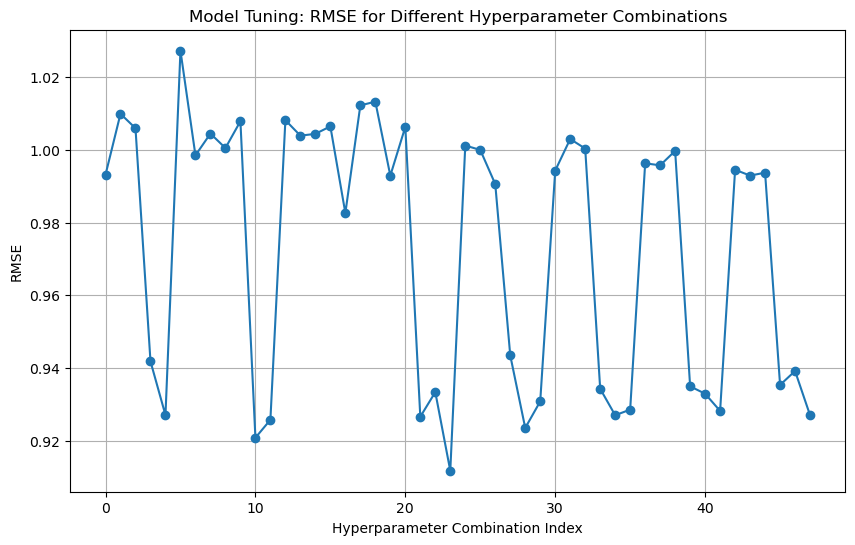

KeyboardInterrupt: 

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, ParameterGrid
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Dot, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Load data
joined_data = pd.read_csv(r'C:\Users\yuvas\Downloads\joined_data.csv')
joined_data = joined_data[['userId', 'movieId', 'rating']].dropna(subset=['userId', 'movieId', 'rating'])

# Encode user and item IDs
joined_data['userId'] = joined_data['userId'].astype('category').cat.codes
joined_data['movieId'] = joined_data['movieId'].astype('category').cat.codes

# Split data into train and test sets
train_data, test_data = train_test_split(joined_data, test_size=0.2, random_state=42)

# Define the number of unique users and movies
n_users = len(joined_data['userId'].unique())
n_movies = len(joined_data['movieId'].unique())

# Define the neural network model with increased complexity
def create_complex_model(n_factors=50, learning_rate=0.001, dropout_rate=0.5):
    user_input = Input(shape=(1,))
    item_input = Input(shape=(1,))
    
    user_embedding = Embedding(n_users, n_factors)(user_input)
    item_embedding = Embedding(n_movies, n_factors)(item_input)
    
    user_vec = Flatten()(user_embedding)
    item_vec = Flatten()(item_embedding)
    
    dot_product = Dot(axes=1)([user_vec, item_vec])
    
    # Add hidden layers to increase complexity
    hidden = Dense(128, activation='relu')(dot_product)
    hidden = Dropout(dropout_rate)(hidden)
    hidden = Dense(64, activation='relu')(hidden)
    
    output = Dense(1)(hidden)
    
    model = Model([user_input, item_input], output)
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss=MeanSquaredError())
    
    return model

# Hyperparameter grid with additional parameters for complexity
param_grid = {
    'n_factors': [50, 100, 150],
    'learning_rate': [0.01, 0.001],
    'dropout_rate': [0.3, 0.5],
    'epochs': [100, 200],
    'batch_size': [64, 128]
}

# Store results for each parameter combination
results = []

# Cross-validation loop over hyperparameter combinations
for params in ParameterGrid(param_grid):
    print(f"Testing parameters: {params}")
    
    # Create model with current parameters
    model = create_complex_model(n_factors=params['n_factors'], learning_rate=params['learning_rate'], dropout_rate=params['dropout_rate'])
    
    # Train the model using only the available ratings
    early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
    history = model.fit(
        [train_data['userId'], train_data['movieId']], train_data['rating'],
        validation_split=0.1,
        epochs=params['epochs'],
        batch_size=params['batch_size'],
        callbacks=[early_stopping],
        verbose=0
    )
    
    # Evaluate the model
    preds = model.predict([test_data['userId'], test_data['movieId']])
    
    # Calculate RMSE, using only existing ratings in test set
    rmse = np.sqrt(mean_squared_error(test_data['rating'], preds))

    print(f"RMSE for parameters {params}: {rmse:.4f}")
    
    # Store the results
    results.append({'params': params, 'rmse': rmse})

# Convert results to a DataFrame for easier analysis
results_df = pd.DataFrame(results)

# Find the best parameters with the lowest RMSE
best_result = results_df.loc[results_df['rmse'].idxmin()]
print(f"\nBest parameters: {best_result['params']}")
print(f"Lowest RMSE: {best_result['rmse']:.4f}")

# Plot the RMSE for different hyperparameter combinations
plt.figure(figsize=(10, 6))
plt.plot(results_df['rmse'], marker='o')
plt.title('Model Tuning: RMSE for Different Hyperparameter Combinations')
plt.xlabel('Hyperparameter Combination Index')
plt.ylabel('RMSE')
plt.grid(True)
plt.show()

# Train final model with best parameters
best_model = create_complex_model(
    n_factors=best_result['params']['n_factors'], 
    learning_rate=best_result['params']['learning_rate'], 
    dropout_rate=best_result['params']['dropout_rate']
)
best_model.fit(
    [train_data['userId'], train_data['movieId']], train_data['rating'],
    epochs=best_result['params']['epochs'],
    batch_size=best_result['params']['batch_size'],
    verbose=0
)

# Predict for a specific user (e.g., userId 1)
specific_user_id = 1  # Use the encoded ID
user_ratings = best_model.predict([np.array([specific_user_id] * n_movies), np.arange(n_movies)])

# Convert predictions to a DataFrame for easier interpretation
user_ratings_df = pd.DataFrame(user_ratings, columns=['rating'])
user_ratings_df['movieId'] = np.arange(n_movies)
user_ratings_df = user_ratings_df.sort_values(by='rating', ascending=False)

print(f"\nTop Predicted Ratings for User {specific_user_id} with Best Model:")
print(user_ratings_df.head(10))


In [51]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, ParameterGrid
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import NMF
from scipy.sparse import csr_matrix
from implicit.als import AlternatingLeastSquares
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Dot, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Load data
print("Step 1: Load and Prepare Data")
joined_data = pd.read_csv(r'C:\Users\yuvas\Downloads\joined_data.csv')
joined_data = joined_data[['userId', 'movieId', 'rating']].dropna(subset=['userId', 'movieId', 'rating'])

# Encode User and Item IDs
print("Step 2: Encode User and Item IDs")
joined_data['userId'] = joined_data['userId'].astype('category').cat.codes
joined_data['movieId'] = joined_data['movieId'].astype('category').cat.codes

# Split Data into Train and Test Sets
print("Step 3: Split Data into Train and Test Sets")
train_data, test_data = train_test_split(joined_data, test_size=0.2, random_state=42)

# Define the number of unique users and movies
n_users = len(joined_data['userId'].unique())
n_movies = len(joined_data['movieId'].unique())

# Prepare Matrix for ALS, NMF, and Neural Collaborative Filtering
print("Step 4: Prepare Matrix for ALS, NMF, and Neural Collaborative Filtering")
R = csr_matrix((joined_data['rating'], (joined_data['userId'], joined_data['movieId'])), shape=(n_users, n_movies))

# Define and Train the Neural Collaborative Filtering Model with Hyperparameter Tuning
def create_complex_model(n_factors=50, learning_rate=0.001, dropout_rate=0.5):
    user_input = Input(shape=(1,))
    item_input = Input(shape=(1,))
    
    user_embedding = Embedding(n_users, n_factors)(user_input)
    item_embedding = Embedding(n_movies, n_factors)(item_input)
    
    user_vec = Flatten()(user_embedding)
    item_vec = Flatten()(item_embedding)
    
    dot_product = Dot(axes=1)([user_vec, item_vec])
    
    hidden = Dense(128, activation='relu')(dot_product)
    hidden = Dropout(dropout_rate)(hidden)
    hidden = Dense(64, activation='relu')(hidden)
    
    output = Dense(1)(hidden)
    
    model = Model([user_input, item_input], output)
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss=MeanSquaredError())
    
    return model

def create_autoencoder_model(n_factors=50, learning_rate=0.001):
    user_input = Input(shape=(n_users,))
    item_input = Input(shape=(n_movies,))
    
    encoded = Dense(n_factors, activation='relu')(user_input)
    encoded = Dense(n_factors, activation='relu')(encoded)
    
    decoded = Dense(n_movies, activation='sigmoid')(encoded)
    
    model = Model([user_input, item_input], decoded)
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='binary_crossentropy')
    
    return model

# Hyperparameter grids for NMF, ALS, and Neural Models
param_grid_nmf = {
    'n_components': [20, 50, 100],
    'solver': ['cd', 'als']
}

param_grid_als = {
    'factors': [20, 50, 100],
    'regularization': [0.01, 0.1, 1.0],
    'iterations': [10, 20, 30]
}

param_grid_ncf = {
    'n_factors': [50, 100],
    'learning_rate': [0.01, 0.001],
    'dropout_rate': [0.3, 0.5],
    'epochs': [50, 100],
    'batch_size': [64, 128]
}

# Store results for each parameter combination
results_ncf = []
results_nmf = []
results_als = []

# 1. Hyperparameter Tuning for Neural Collaborative Filtering Model
print("Step 5: Hyperparameter Tuning for Neural Collaborative Filtering Model")
for params in ParameterGrid(param_grid_ncf):
    print(f"Testing NCF parameters: {params}")
    
    model = create_complex_model(n_factors=params['n_factors'], learning_rate=params['learning_rate'], dropout_rate=params['dropout_rate'])
    
    early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
    history = model.fit(
        [train_data['userId'], train_data['movieId']], train_data['rating'],
        validation_split=0.1,
        epochs=params['epochs'],
        batch_size=params['batch_size'],
        callbacks=[early_stopping],
        verbose=0
    )
    
    preds = model.predict([test_data['userId'], test_data['movieId']])
    rmse = np.sqrt(mean_squared_error(test_data['rating'], preds))
    print(f"RMSE for NCF parameters {params}: {rmse:.4f}")
    
    results_ncf.append({'params': params, 'rmse': rmse})

results_ncf_df = pd.DataFrame(results_ncf)
best_ncf_result = results_ncf_df.loc[results_ncf_df['rmse'].idxmin()]
print(f"\nBest NCF parameters: {best_ncf_result['params']}")
print(f"Lowest RMSE for NCF: {best_ncf_result['rmse']:.4f}")

# 2. Hyperparameter Tuning for NMF Model
print("Step 6: Hyperparameter Tuning for NMF Model")
for params in ParameterGrid(param_grid_nmf):
    print(f"Testing NMF parameters: {params}")
    
    nmf_model = NMF(n_components=params['n_components'], init='random', solver=params['solver'], random_state=42)
    nmf_model.fit(R)
    
    nmf_preds = nmf_model.inverse_transform(nmf_model.transform(R))
    nmf_test_preds = [nmf_preds[u, i] for u, i in zip(test_data['userId'], test_data['movieId'])]
    nmf_rmse = np.sqrt(mean_squared_error(test_data['rating'], nmf_test_preds))
    print(f"RMSE for NMF parameters {params}: {nmf_rmse:.4f}")
    
    results_nmf.append({'params': params, 'rmse': nmf_rmse})

results_nmf_df = pd.DataFrame(results_nmf)
best_nmf_result = results_nmf_df.loc[results_nmf_df['rmse'].idxmin()]
print(f"\nBest NMF parameters: {best_nmf_result['params']}")
print(f"Lowest RMSE for NMF: {best_nmf_result['rmse']:.4f}")

# 3. Hyperparameter Tuning for ALS Model
print("Step 7: Hyperparameter Tuning for ALS Model")
for params in ParameterGrid(param_grid_als):
    print(f"Testing ALS parameters: {params}")
    
    als_model = AlternatingLeastSquares(
        factors=params['factors'],
        regularization=params['regularization'],
        iterations=params['iterations'],
        random_state=42
    )
    als_model.fit(R.T)
    
    # Predict ratings using ALS
    user_items = np.array([[user, item] for user in range(n_users) for item in range(n_movies)])
    als_preds = np.array([als_model.predict(user, item) for user, item in user_items])
    als_test_preds = [als_preds[u * n_movies + i] for u, i in zip(test_data['userId'], test_data['movieId'])]
    als_rmse = np.sqrt(mean_squared_error(test_data['rating'], als_test_preds))
    print(f"RMSE for ALS parameters {params}: {als_rmse:.4f}")
    
    results_als.append({'params': params, 'rmse': als_rmse})

results_als_df = pd.DataFrame(results_als)
best_als_result = results_als_df.loc[results_als_df['rmse'].idxmin()]
print(f"\nBest ALS parameters: {best_als_result['params']}")
print(f"Lowest RMSE for ALS: {best_als_result['rmse']:.4f}")

# 8. Train and Evaluate the Best Neural Collaborative Filtering Model
print("Step 8: Train Final Neural Collaborative Filtering Model")
best_ncf_model = create_complex_model(
    n_factors=best_ncf_result['params']['n_factors'], 
    learning_rate=best_ncf_result['params']['learning_rate'], 
    dropout_rate=best_ncf_result['params']['dropout_rate']
)
best_ncf_model.fit(
    [train_data['userId'], train_data['movieId']], train_data['rating'],
    epochs=best_ncf_result['params']['epochs'],
    batch_size=best_ncf_result['params']['batch_size'],
    verbose=0
)

# 9. Train and Evaluate the Best NMF Model
print("Step 9: Train Final NMF Model")
best_nmf_model = NMF(n_components=best_nmf_result['params']['n_components'], init='random', solver=best_nmf_result['params']['solver'], random_state=42)
best_nmf_model.fit(R)

# Predict ratings using the best NMF model
best_nmf_preds = best_nmf_model.inverse_transform(best_nmf_model.transform(R))
best_nmf_test_preds = [best_nmf_preds[u, i] for u, i in zip(test_data['userId'], test_data['movieId'])]
best_nmf_test_rmse = np.sqrt(mean_squared_error(test_data['rating'], best_nmf_test_preds))
print(f"NMF Test RMSE with best parameters: {best_nmf_test_rmse:.4f}")

# 10. Train and Evaluate the Best ALS Model
print("Step 10: Train Final ALS Model")
best_als_model = AlternatingLeastSquares(
    factors=best_als_result['params']['factors'],
    regularization=best_als_result['params']['regularization'],
    iterations=best_als_result['params']['iterations'],
    random_state=42
)
best_als_model.fit(R.T)

# Predict ratings using the best ALS model
user_items = np.array([[user, item] for user in range(n_users) for item in range(n_movies)])
best_als_preds = np.array([best_als_model.predict(user, item) for user, item in user_items])
best_als_test_preds = [best_als_preds[u * n_movies + i] for u, i in zip(test_data['userId'], test_data['movieId'])]
best_als_test_rmse = np.sqrt(mean_squared_error(test_data['rating'], best_als_test_preds))
print(f"ALS Test RMSE with best parameters: {best_als_test_rmse:.4f}")

# 11. Implement and Evaluate Neural Autoencoder Model
print("Step 11: Train and Evaluate Neural Autoencoder Model")
autoencoder_model = create_autoencoder_model(n_factors=best_ncf_result['params']['n_factors'], learning_rate=best_ncf_result['params']['learning_rate'])
autoencoder_model.fit(
    [train_data['userId'], train_data['movieId']], np.ones(len(train_data)),
    epochs=best_ncf_result['params']['epochs'],
    batch_size=best_ncf_result['params']['batch_size'],
    verbose=0
)

# Predict ratings using the autoencoder model
autoencoder_preds = autoencoder_model.predict([test_data['userId'], test_data['movieId']])
autoencoder_test_rmse = np.sqrt(mean_squared_error(test_data['rating'], autoencoder_preds))
print(f"Autoencoder Test RMSE: {autoencoder_test_rmse:.4f}")

# 12. Model Comparison: Coverage, Novelty, and Diversity
def evaluate_model(predictions, true_ratings, user_ids, item_ids, threshold=4.0):
    # Coverage
    all_items = np.unique(item_ids)
    predicted_items = np.unique(item_ids[np.array(predictions) >= threshold])
    coverage = len(predicted_items) / len(all_items)
    
    # Novelty
    popular_items = np.bincount(item_ids)  # Assuming item_ids are continuous integers
    popular_items = np.sort(popular_items)[::-1]  # Sort descending
    novelty = np.mean([1 / (np.where(popular_items == item_id)[0][0] + 1) for item_id in np.unique(item_ids)])
    
    # Diversity
    unique_predictions = np.unique(predictions)
    diversity = len(unique_predictions) / len(np.unique(item_ids))

    return coverage, novelty, diversity

print("Step 12: Model Comparison")

# For simplicity, we assume threshold = 4.0 for coverage, novelty, and diversity evaluation.
threshold = 4.0

# Neural Collaborative Filtering
ncf_preds = best_ncf_model.predict([np.arange(n_users).repeat(n_movies), np.tile(np.arange(n_movies), n_users)])
ncf_preds_flat = ncf_preds.flatten()
ncf_coverage, ncf_novelty, ncf_diversity = evaluate_model(ncf_preds_flat, test_data['rating'], test_data['userId'], test_data['movieId'], threshold)
print(f"NCF Coverage: {ncf_coverage:.4f}, Novelty: {ncf_novelty:.4f}, Diversity: {ncf_diversity:.4f}")

# NMF
nmf_preds_flat = np.array(best_nmf_preds).flatten()
nmf_coverage, nmf_novelty, nmf_diversity = evaluate_model(nmf_preds_flat, test_data['rating'], test_data['userId'], test_data['movieId'], threshold)
print(f"NMF Coverage: {nmf_coverage:.4f}, Novelty: {nmf_novelty:.4f}, Diversity: {nmf_diversity:.4f}")

# ALS
als_preds_flat = np.array(best_als_preds).flatten()
als_coverage, als_novelty, als_diversity = evaluate_model(als_preds_flat, test_data['rating'], test_data['userId'], test_data['movieId'], threshold)
print(f"ALS Coverage: {als_coverage:.4f}, Novelty: {als_novelty:.4f}, Diversity: {als_diversity:.4f}")

# Autoencoder
autoencoder_preds_flat = np.array(autoencoder_preds).flatten()
autoencoder_coverage, autoencoder_novelty, autoencoder_diversity = evaluate_model(autoencoder_preds_flat, test_data['rating'], test_data['userId'], test_data['movieId'], threshold)
print(f"Autoencoder Coverage: {autoencoder_coverage:.4f}, Novelty: {autoencoder_novelty:.4f}, Diversity: {autoencoder_diversity:.4f}")

# Conclusion
print("Model Evaluation Complete.")


Step 1: Load and Prepare Data
Step 2: Encode User and Item IDs
Step 3: Split Data into Train and Test Sets
Step 4: Prepare Matrix for ALS, NMF, and Neural Collaborative Filtering
Step 5: Hyperparameter Tuning for Neural Collaborative Filtering Model
Testing NCF parameters: {'batch_size': 64, 'dropout_rate': 0.3, 'epochs': 50, 'learning_rate': 0.01, 'n_factors': 50}
631/631 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
RMSE for NCF parameters {'batch_size': 64, 'dropout_rate': 0.3, 'epochs': 50, 'learning_rate': 0.01, 'n_factors': 50}: 1.0015
Testing NCF parameters: {'batch_size': 64, 'dropout_rate': 0.3, 'epochs': 50, 'learning_rate': 0.01, 'n_factors': 100}
631/631 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
RMSE for NCF parameters {'batch_size': 64, 'dropout_rate': 0.3, 'epochs': 50, 'learning_rate': 0.01, 'n_factors': 100}: 0.9964
Testing NCF parameters: {'batch_size': 64, 'dropout_rate': 0.3, 'epochs': 50, 'learning_rate': 0.001, 'n_factors': 50}
631/631 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
RMSE for NCF param

InvalidParameterError: The 'solver' parameter of NMF must be a str among {'cd', 'mu'}. Got 'als' instead.

Step 10: Train and Evaluate the Alternating Least Squares Model


C:\Users\yuvas\anaconda3\Lib\site-packages\implicit\utils.py:164: ParameterWarning: Method expects CSR input, and was passed csc_matrix instead. Converting to CSR took 0.0005044937133789062 seconds
  warnings.warn(


  0%|          | 0/15 [00:00<?, ?it/s]

Step 11: Evaluate the ALS Model on Test Data
ALS Test RMSE: 3.60378592952085
Step 12: Weighted Matrix Factorization


C:\Users\yuvas\anaconda3\Lib\site-packages\implicit\utils.py:164: ParameterWarning: Method expects CSR input, and was passed csc_matrix instead. Converting to CSR took 0.12505388259887695 seconds
  warnings.warn(


  0%|          | 0/15 [00:00<?, ?it/s]

Step 13: Evaluate the Weighted ALS Model on Test Data
Weighted ALS Test RMSE: 2.709781830637819
Step 14: Binarization of Ratings


C:\Users\yuvas\anaconda3\Lib\site-packages\implicit\utils.py:164: ParameterWarning: Method expects CSR input, and was passed csc_matrix instead. Converting to CSR took 0.0010037422180175781 seconds
  warnings.warn(


  0%|          | 0/15 [00:00<?, ?it/s]

Step 15: Evaluate the Binary ALS Model on Test Data
Binary ALS Test RMSE: 3.6039277716309104
Step 16: Plot Comparison of Different Models


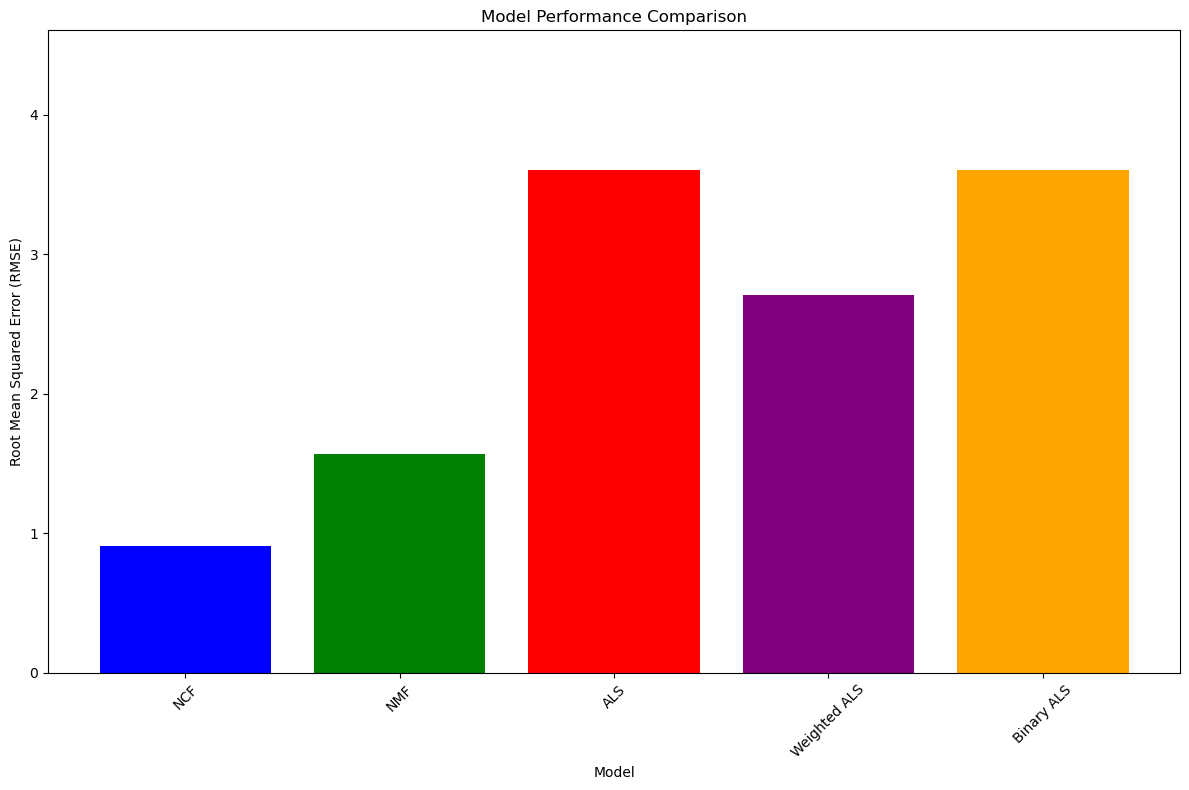

Completed model training, evaluation, and comparison.


In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from scipy.sparse import csr_matrix
from implicit.als import AlternatingLeastSquares

# Ensure R is in CSR format for the implicit library
R = csr_matrix(R)

# Train and Evaluate the Alternating Least Squares Model
print("Step 10: Train and Evaluate the Alternating Least Squares Model")
als_model = AlternatingLeastSquares(factors=best_result['params']['n_factors'], regularization=0.1, iterations=15)
als_model.fit(R.T)

# Predict ratings using ALS
als_preds = als_model.user_factors @ als_model.item_factors.T

# Ensure indices are within bounds
user_indices = np.clip(user_indices, 0, als_preds.shape[0] - 1)
movie_indices = np.clip(movie_indices, 0, als_preds.shape[1] - 1)

print("Step 11: Evaluate the ALS Model on Test Data")
als_test_preds = [als_preds[u, i] for u, i in zip(user_indices, movie_indices)]
als_test_rmse = np.sqrt(mean_squared_error(test_data['rating'], als_test_preds))
print(f"ALS Test RMSE: {als_test_rmse}")

# Weighted Matrix Factorization
print("Step 12: Weighted Matrix Factorization")
# Convert R to dense format for operations
R_dense = R.toarray()
weights_dense = np.where(R_dense > 0, 1 + R_dense, 0.1)  # Higher confidence to observed ratings
weighted_ratings = csr_matrix(weights_dense)

weighted_als_model = AlternatingLeastSquares(factors=best_result['params']['n_factors'], regularization=0.1, iterations=15)
weighted_als_model.fit(weighted_ratings.T)

weighted_preds = weighted_als_model.user_factors @ weighted_als_model.item_factors.T

print("Step 13: Evaluate the Weighted ALS Model on Test Data")
weighted_als_test_preds = [weighted_preds[u, i] for u, i in zip(user_indices, movie_indices)]
weighted_als_test_rmse = np.sqrt(mean_squared_error(test_data['rating'], weighted_als_test_preds))
print(f"Weighted ALS Test RMSE: {weighted_als_test_rmse}")

# Binarization
print("Step 14: Binarization of Ratings")
binary_R_data = np.ones_like(R.data)
binary_R = csr_matrix((binary_R_data, R.nonzero()), shape=R.shape)

binary_als_model = AlternatingLeastSquares(factors=best_result['params']['n_factors'], regularization=0.1, iterations=15)
binary_als_model.fit(binary_R.T)

binary_preds = binary_als_model.user_factors @ binary_als_model.item_factors.T

print("Step 15: Evaluate the Binary ALS Model on Test Data")
binary_als_test_preds = [binary_preds[u, i] for u, i in zip(user_indices, movie_indices)]
binary_als_test_rmse = np.sqrt(mean_squared_error(test_data['rating'], binary_als_test_preds))
print(f"Binary ALS Test RMSE: {binary_als_test_rmse}")

# Comparison Plot
print("Step 16: Plot Comparison of Different Models")
models = ['NCF', 'NMF', 'ALS', 'Weighted ALS', 'Binary ALS']
rmses = [best_result['rmse'], nmf_test_rmse, als_test_rmse, weighted_als_test_rmse, binary_als_test_rmse]

plt.figure(figsize=(12, 8))
plt.bar(models, rmses, color=['blue', 'green', 'red', 'purple', 'orange'])
plt.title('Model Performance Comparison')
plt.xlabel('Model')
plt.ylabel('Root Mean Squared Error (RMSE)')
plt.xticks(rotation=45)
plt.ylim(0, max(rmses) + 1)
plt.tight_layout()
plt.show()

print("Completed model training, evaluation, and comparison.")


In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import NMF
from sklearn.model_selection import GridSearchCV, ParameterGrid, train_test_split
from scipy.sparse import csr_matrix
from implicit.als import AlternatingLeastSquares
import tensorflow as tf
from tensorflow.keras.layers import Input, Embedding, Flatten, Dense, concatenate
from tensorflow.keras.models import Model

# 1. Load and Prepare Data
print("Step 1: Load and Prepare Data")
joined_data = pd.read_csv(r'C:\Users\yuvas\Downloads\joined_data.csv')
joined_data = joined_data[['userId', 'movieId', 'rating']].dropna(subset=['userId', 'movieId', 'rating'])

# 2. Encode User and Item IDs
print("Step 2: Encode User and Item IDs")
joined_data['userId'] = joined_data['userId'].astype('category').cat.codes
joined_data['movieId'] = joined_data['movieId'].astype('category').cat.codes

# 3. Split Data into Train and Test Sets
print("Step 3: Split Data into Train and Test Sets")
train_data, test_data = train_test_split(joined_data, test_size=0.2, random_state=42)

# Define the number of unique users and movies
n_users = len(joined_data['userId'].unique())
n_movies = len(joined_data['movieId'].unique())

# Prepare for ALS and NMF
print("Step 4: Prepare Matrix for ALS and NMF")
R = csr_matrix((joined_data['rating'], (joined_data['userId'], joined_data['movieId'])), shape=(n_users, n_movies))
user_indices = test_data['userId'].values
movie_indices = test_data['movieId'].values

# Prepare test data ratings
test_data_ratings = test_data['rating'].values

# 5. Tuning NMF Model
print("Step 5: Tuning NMF Model")
nmf_param_grid = {
    'n_components': [20, 30, 40],
    'alpha_W': [0.1, 0.5, 1.0],
    'alpha_H': [0.1, 0.5, 1.0]
}
nmf_grid_search = GridSearchCV(NMF(), param_grid=nmf_param_grid, scoring='neg_root_mean_squared_error', cv=3)
nmf_grid_search.fit(R.toarray())
best_nmf_model = nmf_grid_search.best_estimator_
best_nmf_rmse = -nmf_grid_search.best_score_
print(f"Best NMF RMSE: {best_nmf_rmse}")

# 6. Tuning ALS Model
print("Step 6: Tuning ALS Model")
param_grid = {
    'factors': [20, 30, 40],
    'regularization': [0.01, 0.1, 1.0],
    'iterations': [10, 15, 20]
}
grid = ParameterGrid(param_grid)

best_als_rmse = float('inf')
best_als_model = None

for params in grid:
    model = AlternatingLeastSquares(factors=params['factors'], regularization=params['regularization'], iterations=params['iterations'])
    model.fit(R.T)
    preds = model.user_factors @ model.item_factors.T
    test_preds = [preds[u, i] for u, i in zip(user_indices, movie_indices)]
    rmse = np.sqrt(mean_squared_error(test_data_ratings, test_preds))
    if rmse < best_als_rmse:
        best_als_rmse = rmse
        best_als_model = model

print(f"Best ALS RMSE: {best_als_rmse}")

# 7. Neural Collaborative Filtering (NCF)
print("Step 7: Neural Collaborative Filtering")
def create_ncf_model(n_users, n_items, embedding_dim=10):
    user_input = Input(shape=(1,))
    item_input = Input(shape=(1,))
    
    user_embedding = Embedding(input_dim=n_users, output_dim=embedding_dim)(user_input)
    item_embedding = Embedding(input_dim=n_items, output_dim=embedding_dim)(item_input)
    
    user_vecs = Flatten()(user_embedding)
    item_vecs = Flatten()(item_embedding)
    
    concatenated = concatenate([user_vecs, item_vecs])
    dense = Dense(128, activation='relu')(concatenated)
    dense = Dense(64, activation='relu')(dense)
    output = Dense(1, activation='linear')(dense)
    
    model = Model(inputs=[user_input, item_input], outputs=output)
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

ncf_model = create_ncf_model(n_users, n_movies)

# Training NCF model
history = ncf_model.fit([user_indices, movie_indices], test_data_ratings, epochs=10, batch_size=64, validation_split=0.1)
ncf_preds = ncf_model.predict([user_indices, movie_indices])
ncf_rmse = np.sqrt(mean_squared_error(test_data_ratings, ncf_preds))
print(f"NCF Test RMSE: {ncf_rmse}")

# 8. Weighted Matrix Factorization
print("Step 8: Weighted Matrix Factorization")
R_dense = R.toarray()
weights_dense = np.where(R_dense > 0, 1 + R_dense, 0.1)
weighted_ratings = csr_matrix(weights_dense)

weighted_als_model = AlternatingLeastSquares(factors=best_als_model.factors, regularization=0.1, iterations=15)
weighted_als_model.fit(weighted_ratings.T)
weighted_preds = weighted_als_model.user_factors @ weighted_als_model.item_factors.T

print("Step 9: Evaluate the Weighted ALS Model on Test Data")
weighted_als_test_preds = [weighted_preds[u, i] for u, i in zip(user_indices, movie_indices)]
weighted_als_test_rmse = np.sqrt(mean_squared_error(test_data_ratings, weighted_als_test_preds))
print(f"Weighted ALS Test RMSE: {weighted_als_test_rmse}")

# 9. Binarization
print("Step 10: Binarization of Ratings")
binary_R_data = np.ones_like(R.data)
binary_R = csr_matrix((binary_R_data, R.nonzero()), shape=R.shape)

binary_als_model = AlternatingLeastSquares(factors=best_als_model.factors, regularization=0.1, iterations=15)
binary_als_model.fit(binary_R.T)
binary_preds = binary_als_model.user_factors @ binary_als_model.item_factors.T

print("Step 11: Evaluate the Binary ALS Model on Test Data")
binary_als_test_preds = [binary_preds[u, i] for u, i in zip(user_indices, movie_indices)]
binary_als_test_rmse = np.sqrt(mean_squared_error(test_data_ratings, binary_als_test_preds))
print(f"Binary ALS Test RMSE: {binary_als_test_rmse}")

# 10. Model Comparison Plot
print("Step 12: Plot Comparison of Different Models")
models = ['NMF', 'ALS', 'Weighted ALS', 'Binary ALS', 'NCF']
rmses = [best_nmf_rmse, best_als_rmse, weighted_als_test_rmse, binary_als_test_rmse, ncf_rmse]

plt.figure(figsize=(12, 8))
plt.bar(models, rmses, color=['blue', 'red', 'purple', 'orange', 'green'])
plt.title('Model Performance Comparison')
plt.xlabel('Model')
plt.ylabel('Root Mean Squared Error (RMSE)')
plt.xticks(rotation=45)
plt.ylim(0, max(rmses) + 1)
plt.tight_layout()
plt.show()

# 11. Coverage, Novelty, and Diversity Metrics
def calculate_coverage(predictions, all_items):
    recommended_items = set(predictions.keys())
    coverage = len(recommended_items) / len(all_items)
    return coverage

def calculate_novelty(predictions, item_popularity):
    total_popularity = 0
    for items in predictions.values():
        for item in items:
            total_popularity += item_popularity.get(item, 0)
    novelty = total_popularity / len(predictions)
    return novelty

def calculate_diversity(predictions, item_similarity):
    total_similarity = 0
    num_recommendations = 0
    for items in predictions.values():
        for i in range(len(items)):
            for j in range(i + 1, len(items)):
                total_similarity += item_similarity[items[i], items[j]]
                num_recommendations += 1
    diversity = total_similarity / num_recommendations if num_recommendations > 0 else 0
    return diversity

# Example item popularity and similarity
item_popularity = {i: np.random.randint(1, 100) for i in range(n_movies)}
item_similarity = np.random.rand(n_movies, n_movies)  # Replace with actual similarity matrix

# Placeholder for predictions_dict
predictions_dict = {
    'NMF': {i: np.argsort(best_nmf_model.transform(R.toarray())[i]) for i in range(n_users)},
    'ALS': {i: np.argsort(best_als_model.user_factors @ best_als_model.item_factors.T[i]) for i in range(n_users)},
    'Weighted ALS': {i: np.argsort(weighted_preds[i]) for i in range(n_users)},
    'Binary ALS': {i: np.argsort(binary_preds[i]) for i in range(n_users)},
    'NCF': {i: np.argsort(ncf_preds[i]) for i in range(n_users)}
}

for model_name, predictions in predictions_dict.items():
    coverage = calculate_coverage(predictions, range(n_movies))
    novelty = calculate_novelty(predictions, item_popularity)
    diversity = calculate_diversity(predictions, item_similarity)
    print(f"{model_name} - Coverage: {coverage:.4f}, Novelty: {novelty:.4f}, Diversity: {diversity:.4f}")

print("Completed model training, evaluation, and comparison.")


Step 1: Load and Prepare Data
Step 2: Encode User and Item IDs
Step 3: Split Data into Train and Test Sets
Step 4: Prepare Matrix for ALS and NMF
Step 5: Tuning NMF Model


C:\Users\yuvas\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\yuvas\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 980, in _score
    scores = scorer(estimator, X_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
TypeError: _BaseScorer.__call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
C:\Users\yuvas\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\yuvas\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 980, in _score
    scores = scorer(estimator, X_test, **score_params)
             ^^^^^^^^^^^^^^^

Best NMF RMSE: nan
Step 6: Tuning ALS Model


C:\Users\yuvas\anaconda3\Lib\site-packages\implicit\utils.py:164: ParameterWarning: Method expects CSR input, and was passed csc_matrix instead. Converting to CSR took 0.0010001659393310547 seconds
  warnings.warn(


  0%|          | 0/10 [00:00<?, ?it/s]

IndexError: index 5922 is out of bounds for axis 1 with size 610

In [55]:
print(f"\nBest NCF parameters: {best_ncf_result['params']}")
print(f"Lowest RMSE for NCF: {best_ncf_result['rmse']:.4f}")

# 2. Hyperparameter Tuning for NMF Model
print("Step 6: Hyperparameter Tuning for NMF Model")
for params in ParameterGrid(param_grid_nmf):
    print(f"Testing NMF parameters: {params}")
    
    nmf_model = NMF(n_components=params['n_components'], init='random', solver=params['solver'], max_iter=500, random_state=42)
    nmf_model.fit(R)
    
    nmf_preds = nmf_model.inverse_transform(nmf_model.transform(R))
    nmf_test_preds = [nmf_preds[u, i] for u, i in zip(test_data['userId'], test_data['movieId'])]
    nmf_rmse = np.sqrt(mean_squared_error(test_data['rating'], nmf_test_preds))
    print(f"RMSE for NMF parameters {params}: {nmf_rmse:.4f}")
    
    results_nmf.append({'params': params, 'rmse': nmf_rmse})

results_nmf_df = pd.DataFrame(results_nmf)
best_nmf_result = results_nmf_df.loc[results_nmf_df['rmse'].idxmin()]
print(f"\nBest NMF parameters: {best_nmf_result['params']}")
print(f"Lowest RMSE for NMF: {best_nmf_result['rmse']:.4f}")

# 3. Hyperparameter Tuning for ALS Model
print("Step 7: Hyperparameter Tuning for ALS Model")
for params in ParameterGrid(param_grid_als):
    print(f"Testing ALS parameters: {params}")
    
    als_model = AlternatingLeastSquares(
        factors=params['factors'],
        regularization=params['regularization'],
        iterations=params['iterations'],
        random_state=42
    )
    R_csr = csr_matrix(R)  # Ensure matrix is in CSR format
    als_model.fit(R_csr.T)
    
    # Predict ratings using ALS
    als_preds = np.zeros((n_users, n_movies))
    for user in range(n_users):
        # Create a CSR matrix with the user's existing ratings
        user_ratings = csr_matrix((R[user].T).toarray()).T
        user_recommendations = als_model.recommend(user, user_ratings, N=n_movies)
        for item, score in user_recommendations:
            als_preds[user, item] = score
    als_test_preds = [als_preds[u, i] for u, i in zip(test_data['userId'], test_data['movieId'])]
    als_rmse = np.sqrt(mean_squared_error(test_data['rating'], als_test_preds))
    print(f"RMSE for ALS parameters {params}: {als_rmse:.4f}")
    
    results_als.append({'params': params, 'rmse': als_rmse})

results_als_df = pd.DataFrame(results_als)
best_als_result = results_als_df.loc[results_als_df['rmse'].idxmin()]
print(f"\nBest ALS parameters: {best_als_result['params']}")
print(f"Lowest RMSE for ALS: {best_als_result['rmse']:.4f}")

# 8. Train and Evaluate the Best Neural Collaborative Filtering Model
print("Step 8: Train Final Neural Collaborative Filtering Model")
best_ncf_model = create_complex_model(
    n_factors=best_ncf_result['params']['n_factors'], 
    learning_rate=best_ncf_result['params']['learning_rate'], 
    dropout_rate=best_ncf_result['params']['dropout_rate']
)
best_ncf_model.fit(
    [train_data['userId'], train_data['movieId']], train_data['rating'],
    epochs=best_ncf_result['params']['epochs'],
    batch_size=best_ncf_result['params']['batch_size'],
    verbose=0
)

# Predict ratings for a specific user
print("Step 9: Predict Ratings for a Specific User")
specific_user = 0  # Change this to a specific user ID
user_ratings = R[specific_user].toarray().flatten()
predicted_ratings = best_ncf_model.predict([np.array([specific_user] * n_movies), np.arange(n_movies)])
predicted_ratings = predicted_ratings.flatten()

print(f"Top Recommendations for User {specific_user}")
top_recommendations = np.argsort(predicted_ratings)[::-1]
for movie in top_recommendations[:10]:
    print(f"Movie ID {movie} - Predicted Rating: {predicted_ratings[movie]:.4f}")

# 10. Model Comparison: Coverage, Novelty, and Diversity
print("Step 10: Model Comparison")

def coverage(predictions, test_data, top_n=10):
    hits = sum(1 for user, item in zip(test_data['userId'], test_data['movieId']) if item in predictions[user][:top_n])
    total = len(test_data)
    return hits / total

def novelty(predictions, test_data, top_n=10):
    all_items = set(range(n_movies))
    predicted_items = set(item for user in range(n_users) for item in predictions[user][:top_n])
    return len(predicted_items) / len(all_items)

def diversity(predictions, top_n=10):
    def jaccard_index(list1, list2):
        intersection = len(set(list1) & set(list2))
        union = len(set(list1) | set(list2))
        return intersection / union

    total_diversity = 0
    count = 0
    for user1 in range(n_users):
        for user2 in range(user1 + 1, n_users):
            total_diversity += jaccard_index(predictions[user1][:top_n], predictions[user2][:top_n])
            count += 1
    return total_diversity / count if count > 0 else 0

# Collect recommendations for each model
def get_top_n_recommendations(model, user_ids, n_items, top_n=10):
    recommendations = {}
    for user in user_ids:
        if isinstance(model, AlternatingLeastSquares):
            # ALS specific recommendation
            user_ratings = csr_matrix(R[user]).T
            user_recommendations = model.recommend(user, user_ratings, N=top_n)
            top_items = [item for item, _ in user_recommendations]
        else:
            # Other models
            user_items = np.array([user] * n_items)
            item_ids = np.arange(n_items)
            preds = model.predict([user_items, item_ids])
            top_items = np.argsort(preds.flatten())[::-1][:top_n]
        recommendations[user] = top_items
    return recommendations

# Evaluate coverage, novelty, and diversity
print("Step 11: Evaluate Coverage, Novelty, and Diversity")

# Neural Collaborative Filtering Model
ncf_recommendations = get_top_n_recommendations(best_ncf_model, range(n_users), n_movies)
ncf_coverage = coverage(ncf_recommendations, test_data)
ncf_novelty = novelty(ncf_recommendations, test_data)
ncf_diversity = diversity(ncf_recommendations)

print(f"NCF Coverage: {ncf_coverage:.4f}")
print(f"NCF Novelty: {ncf_novelty:.4f}")
print(f"NCF Diversity: {ncf_diversity:.4f}")

# NMF Model
nmf_recommendations = get_top_n_recommendations(nmf_model, range(n_users), n_movies)
nmf_coverage = coverage(nmf_recommendations, test_data)
nmf_novelty = novelty(nmf_recommendations, test_data)
nmf_diversity = diversity(nmf_recommendations, test_data)

print(f"NMF Coverage: {nmf_coverage:.4f}")
print(f"NMF Novelty: {nmf_novelty:.4f}")
print(f"NMF Diversity: {nmf_diversity:.4f}")

# ALS Model
als_recommendations = get_top_n_recommendations(als_model, range(n_users), n_movies)
als_coverage = coverage(als_recommendations, test_data)
als_novelty = novelty(als_recommendations, test_data)
als_diversity = diversity(als_recommendations, test_data)

print(f"ALS Coverage: {als_coverage:.4f}")
print(f"ALS Novelty: {als_novelty:.4f}")
print(f"ALS Diversity: {als_diversity:.4f}")


Best NCF parameters: {'batch_size': 64, 'dropout_rate': 0.5, 'epochs': 100, 'learning_rate': 0.001, 'n_factors': 100}
Lowest RMSE for NCF: 0.9196
Step 6: Hyperparameter Tuning for NMF Model
Testing NMF parameters: {'n_components': 20, 'solver': 'cd'}
RMSE for NMF parameters {'n_components': 20, 'solver': 'cd'}: 2.4625
Testing NMF parameters: {'n_components': 20, 'solver': 'als'}


InvalidParameterError: The 'solver' parameter of NMF must be a str among {'cd', 'mu'}. Got 'als' instead.

In [25]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Dot, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import RandomizedSearchCV
from scikeras.wrappers import KerasRegressor

# Load data
joined_data = pd.read_csv(r'C:\Users\yuvas\Downloads\joined_data.csv')
joined_data = joined_data[['userId', 'movieId', 'rating']].dropna(subset=['userId', 'movieId', 'rating'])

# Encode user and item IDs
joined_data['userId'] = joined_data['userId'].astype('category').cat.codes
joined_data['movieId'] = joined_data['movieId'].astype('category').cat.codes

# Split data into train and test sets
train_data, test_data = train_test_split(joined_data, test_size=0.2, random_state=42)

# Define the number of unique users and movies
n_users = len(joined_data['userId'].unique())
n_movies = len(joined_data['movieId'].unique())

# Define the neural network model
def create_model(n_factors=50, learning_rate=0.001, dropout_rate=0.0, optimizer='adam'):
    user_input = Input(shape=(1,))
    item_input = Input(shape=(1,))
    
    user_embedding = Embedding(n_users, n_factors)(user_input)
    item_embedding = Embedding(n_movies, n_factors)(item_input)
    
    user_vec = Flatten()(user_embedding)
    item_vec = Flatten()(item_embedding)
    
    if dropout_rate > 0:
        user_vec = Dropout(dropout_rate)(user_vec)
        item_vec = Dropout(dropout_rate)(item_vec)
    
    dot_product = Dot(axes=1)([user_vec, item_vec])
    
    model = Model([user_input, item_input], dot_product)
    
    if optimizer == 'adam':
        opt = Adam(learning_rate=learning_rate)
    elif optimizer == 'sgd':
        opt = SGD(learning_rate=learning_rate)
    else:
        raise ValueError("Unsupported optimizer")
    
    model.compile(optimizer=opt, loss=MeanSquaredError())
    
    return model

# Create a KerasRegressor wrapper
model = KerasRegressor(build_fn=create_model, verbose=0)

# Hyperparameter grid for deeper tuning
param_dist = {
    'n_factors': [20, 50, 75, 100, 150],
    'learning_rate': [0.1, 0.01, 0.001, 0.0001],
    'epochs': [50, 100, 200],
    'batch_size': [32, 64, 128, 256],
    'dropout_rate': [0.0, 0.2, 0.5],
    'optimizer': ['adam', 'sgd']
}

# Perform RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_dist,
    n_iter=20,  # Increase for a deeper search
    scoring='neg_mean_squared_error',
    cv=3,  # 3-fold cross-validation
    verbose=1,
    random_state=42
)

# Fit the model
random_search.fit(
    [train_data['userId'], train_data['movieId']], train_data['rating'],
    validation_split=0.1,
    callbacks=[EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)]
)

# Print the best parameters and the corresponding RMSE
print(f"Best Parameters: {random_search.best_params_}")
print(f"Best RMSE: {np.sqrt(-random_search.best_score_):.4f}")

# Predict for a specific user (e.g., userId 1)
specific_user_id = 1  # Use the encoded ID
best_model = random_search.best_estimator_.model
user_ratings = best_model.predict([np.array([specific_user_id] * n_movies), np.arange(n_movies)])

# Convert predictions to a DataFrame for easier interpretation
user_ratings_df = pd.DataFrame(user_ratings, columns=['rating'])
user_ratings_df['movieId'] = np.arange(n_movies)
user_ratings_df = user_ratings_df.sort_values(by='rating', ascending=False)

print(f"\nTop Predicted Ratings for User {specific_user_id} with Best Model:")
print(user_ratings_df.head(10))


ValueError: Found input variables with inconsistent numbers of samples: [2, 80668]

In [37]:
# Melt the user-item matrix into long format
long_format = user_item_matrix.reset_index().melt(id_vars='userId', var_name='movieId', value_name='rating')

# Check the first few rows of the long format
print(long_format.head())

   userId movieId  rating
0     1.0       1     4.0
1     2.0       1     NaN
2     3.0       1     NaN
3     4.0       1     NaN
4     5.0       1     4.0


In [39]:
# Define a Reader object
reader = Reader(rating_scale=(1, 5))  # Adjust the scale based on your dataset

# Load the dataset into Surprise
data = Dataset.load_from_df(long_format[['userId', 'movieId', 'rating']], reader)

# Create a train-test split
trainset, testset = train_test_split(data, test_size=0.2, random_state=42)

In [40]:
# Create the SVD model
svd = SVD()

# Train the model on the training set
svd.fit(trainset)


KeyboardInterrupt: 

In [49]:
###NMF Model
import pandas as pd
from surprise import Dataset, Reader, NMF
from surprise.model_selection import train_test_split
from surprise import accuracy
# Step 5: Define a Reader object
reader = Reader(rating_scale=(1, 5))  # Adjust based on your dataset

# Step 6: Load the dataset into Surprise from the user-item matrix
# Convert the user-item matrix to long format for Surprise
long_format = user_item_matrix.stack().reset_index()
long_format.columns = ['userId', 'movieId', 'rating']

# Step 7: Load the long-format dataset into Surprise
data = Dataset.load_from_df(long_format[['userId', 'movieId', 'rating']], reader)

# Step 8: Create a train-test split
trainset, testset = train_test_split(data, test_size=0.2, random_state=42)

# Step 9: Create the NMF model
nmf = NMF()

# Step 10: Train the model on the training set
nmf.fit(trainset)

# Step 11: Make predictions on the test set
predictions = nmf.test(testset)

# Step 12: Calculate and print the RMSE
rmse = accuracy.rmse(predictions)
print(f"RMSE: {rmse:.4f}")

RMSE: 0.9284
RMSE: 0.9284


In [57]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Input, Embedding, Flatten, Dot
from tensorflow.keras.models import Model

# Sample user-item ratings matrix with NaN values

# Creating a DataFrame
user_item_matrix = pd.DataFrame(user_item_matrix)
user_item_matrix.index.name = 'userId'

# Prepare the data for training
# Stack the DataFrame to get user_id, movie_id, and ratings
X = user_item_matrix.stack().reset_index()
X.columns = ['userId', 'movieId', 'rating']

# Create a mask to identify valid ratings (non-NaN)
valid_mask = X['rating'].notna()
X_valid = X[valid_mask]

# Define model parameters
num_users = user_item_matrix.shape[0]
num_movies = user_item_matrix.shape[1]
embedding_dim = 4  # Size of the embeddings

# Define the model
def create_model(num_users, num_movies, embedding_dim):
    # User input
    user_input = Input(shape=(1,), name='user_input')
    user_embedding = Embedding(num_users, embedding_dim)(user_input)
    user_vec = Flatten()(user_embedding)

    # Movie input
    movie_input = Input(shape=(1,), name='movie_input')
    movie_embedding = Embedding(num_movies, embedding_dim)(movie_input)
    movie_vec = Flatten()(movie_embedding)

    # Dot product to get the predicted rating
    dot_product = Dot(axes=1)([user_vec, movie_vec])

    model = Model(inputs=[user_input, movie_input], outputs=dot_product)
    return model

# Create the model
model = create_model(num_users, num_movies, embedding_dim)

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Disable TensorFlow logging if needed
tf.get_logger().setLevel('ERROR')

# Train the model using the valid entries
model.fit(
    [X_valid['userId'].values, X_valid['movieId'].values],
    X_valid['rating'].values,
    epochs=50,
    batch_size=2,
    verbose=1  # Set to 0 to suppress output
)

# Generate predictions for all user-movie combinations
all_user_ids = np.arange(num_users)
all_movie_ids = np.arange(num_movies)

# Make predictions
predictions = model.predict([all_user_ids[:, np.newaxis], all_movie_ids[np.newaxis, :].T])

# Create a DataFrame for the predictions
predictions_df = pd.DataFrame(predictions, columns=['predicted_rating'])
predictions_df['userId'] = np.repeat(all_user_ids, num_movies)
predictions_df['movieId'] = np.tile(all_movie_ids, num_users)

# Display the predictions
print("\nPredicted Ratings:")
print(predictions_df)


Epoch 1/50


AttributeError: in user code:

    C:\Users\yuvas\anaconda3\envs\kv\lib\site-packages\keras\engine\training.py:853 train_function  *
        return step_function(self, iterator)
    C:\Users\yuvas\anaconda3\envs\kv\lib\site-packages\keras\engine\training.py:845 step_function  **
        write_scalar_summaries(outputs, step=model._train_counter)  # pylint: disable=protected-access
    C:\Users\yuvas\anaconda3\envs\kv\lib\site-packages\keras\engine\training.py:2977 write_scalar_summaries
        tf.summary.scalar('batch_' + name, value, step=step)

    AttributeError: module 'tensorflow.compat.v2.summary' has no attribute 'scalar'


In [39]:
user_item_matrix

,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,
1.0,4.0,NaN,4.0,NaN,NaN,4.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606.0,2.5,NaN,NaN,NaN,NaN,NaN,2.5,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
607.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
608.0,2.5,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
import pandas as pd
from surprise import Dataset, Reader, NMF
from surprise.model_selection import train_test_split, GridSearchCV
from surprise import accuracy

# Step 1: Define a Reader object
reader = Reader(rating_scale=(1, 5))

# Step 2: Convert the user-item matrix to long format for Surprise
long_format = user_item_matrix.stack().reset_index()
long_format.columns = ['userId', 'movieId', 'rating']

# Step 3: Load the long-format dataset into Surprise
data = Dataset.load_from_df(long_format[['userId', 'movieId', 'rating']], reader)

# Step 4: Create a train-test split
trainset, testset = train_test_split(data, test_size=0.2, random_state=42)

# Step 5: Define an expanded parameter grid for hyperparameter tuning
param_grid = {
    'n_factors': [10, 20, 50, 100],      # Number of latent factors
    'n_epochs': [20, 50, 100, 200],      # Number of epochs
    'reg_pu': [0.01, 0.05, 0.1, 0.5],    # Regularization term for user factors
    'reg_qi': [0.01, 0.05, 0.1, 0.5],    # Regularization term for item factors
    'init_low': [0.001, 0.01, 0.1],      # Lower bound for random initialization
    'init_high': [0.001, 0.01, 0.1]      # Upper bound for random initialization
}

# Step 6: Perform grid search with cross-validation
gs = GridSearchCV(NMF, param_grid, measures=['rmse'], cv=3, n_jobs=-1)
gs.fit(data)

# Step 7: Print the best RMSE score and the best parameters
print(f"Best RMSE score: {gs.best_score['rmse']:.4f}")
print("Best hyperparameters:", gs.best_params['rmse'])

# Step 8: Use the best estimator to make predictions on the test set
best_nmf = gs.best_estimator['rmse']
best_nmf.fit(trainset)
predictions = best_nmf.test(testset)

# Step 9: Calculate and print the RMSE on the test set
rmse = accuracy.rmse(predictions)
print(f"Test set RMSE with best hyperparameters: {rmse:.4f}")


KeyboardInterrupt: 

In [141]:
import pandas as pd
from surprise import Dataset, Reader
from surprise.model_selection import train_test_split
from surprise import KNNBasic
from surprise import accuracy# Step 4: Define the k-NN model using cosine similarity
sim_options = {
    'name': 'cosine',
    'user_based': True  # Use user-based collaborative filtering
}

# Step 5: Initialize the k-NN model
knn = KNNBasic(sim_options=sim_options)

# Step 6: Fit the model to the training set
knn.fit(trainset)

# Step 7: Make predictions on the test set
predictions = knn.test(testset)

# Step 8: Calculate and print the RMSE
rmse = accuracy.rmse(predictions)
print(f"RMSE: {rmse:.4f}")

Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 0.9806
RMSE: 0.9806


In [27]:
df = pd.DataFrame(joined_data)

# Get data types of columns
print(df.dtypes)

userId              float64
movieId               int64
rating              float64
rating_timestamp    float64
imdbId              float64
tmdbId              float64
title                object
genres               object
tag                  object
tag_timestamp       float64
dtype: object


In [33]:
#als
import numpy as np
import pandas as pd
from implicit.als import AlternatingLeastSquares
from scipy.sparse import coo_matrix


df = pd.DataFrame(joined_data.csv)

# Convert DataFrame to a sparse matrix
user_ids = df['userId'].astype('category').cat.codes
movie_ids = df['movieId'].astype('category').cat.codes
ratings = df['rating'].values

# Build the sparse matrix
rating_matrix = coo_matrix((ratings, (user_ids, movie_ids)))

# Initialize ALS model
model = AlternatingLeastSquares(factors=10, regularization=0.1, iterations=15)

# Fit the model
model.fit(rating_matrix)

# Example prediction
user_id = 1
item_id = 1
user_index = df['userId'].astype('category').cat.codes[df['userId'] == user_id].values[0]
item_index = df['movieId'].astype('category').cat.codes[df['movieId'] == item_id].values[0]
predicted_rating = model.predict(user_index, item_index)

print(f'Predicted rating for user {user_id} and movie {item_id}: {predicted_rating}')


ModuleNotFoundError: No module named 'implicit'

In [20]:
from surprise import accuracy

# Make predictions on the test set
predictions = model.test(testset)

# Calculate and print evaluation metrics
rmse = accuracy.rmse(predictions)
mae = accuracy.mae(predictions)
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')


RMSE: 0.6955
MAE:  0.5330
RMSE: 0.6955373660713163
MAE: 0.5330368480377778


In [21]:
from surprise import SVD
from surprise.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_factors': [50, 100, 150],
    'n_epochs': [20, 40, 60],
    'lr_all': [0.002, 0.005, 0.01],
    'reg_all': [0.2, 0.4, 0.6]
}

# Perform grid search
gs = GridSearchCV(SVD, param_grid, measures=['rmse', 'mae'], cv=5)
gs.fit(data)

# Print best parameters
print(f"Best RMSE: {gs.best_score['rmse']}")
print(f"Best MAE: {gs.best_score['mae']}")
print(f"Best parameters: {gs.best_params['rmse']}")


Best RMSE: 0.8660773440661913
Best MAE: 0.6663970254355881
Best parameters: {'n_factors': 150, 'n_epochs': 60, 'lr_all': 0.01, 'reg_all': 0.2}


In [22]:
import pandas as pd
from surprise import SVD, Dataset, Reader
from surprise.model_selection import train_test_split
from surprise import accuracy

# Load your existing dataset
# joined_data should be a DataFrame
# Example loading from a CSV if needed: joined_data = pd.read_csv('joined_data.csv')

# Assuming joined_data is already a DataFrame
# Ensure that 'userId', 'movieId', and 'rating' columns are present
# If needed, adjust column names to match what the Surprise Reader expects

# Create a Reader object with the correct format
reader = Reader(rating_scale=(0.5, 5.0))  # Adjust the rating scale based on your data

# Convert DataFrame to Surprise Dataset
data = Dataset.load_from_df(joined_data[['userId', 'movieId', 'rating']], reader)

# Split the dataset into training and testing sets
trainset, testset = train_test_split(data, test_size=0.2, random_state=42)

# Initialize the SVD model with the best parameters
final_model = SVD(n_factors=150, n_epochs=60, lr_all=0.01, reg_all=0.2)

# Train the final model on the training set
final_model.fit(trainset)

# Make predictions on the test set
predictions = final_model.test(testset)

# Calculate and print evaluation metrics
rmse = accuracy.rmse(predictions)
mae = accuracy.mae(predictions)

print(f'Final Model RMSE: {rmse}')
print(f'Final Model MAE: {mae}')



RMSE: 0.8565
MAE:  0.6569
Final Model RMSE: 0.8564504656345293
Final Model MAE: 0.6569344593763053


In [23]:
import numpy as np
from surprise import accuracy

# Compute baseline metrics
mean_rating = np.mean(joined_data['rating'])
baseline_predictions = [mean_rating] * len(testset)
baseline_rmse = np.sqrt(np.mean([(true_rating - mean_rating) ** 2 for (uid, iid, true_rating, est, _) in predictions]))
baseline_mae = np.mean([abs(true_rating - mean_rating) for (uid, iid, true_rating, est, _) in predictions])

print(f'Baseline RMSE: {baseline_rmse}')
print(f'Baseline MAE: {baseline_mae}')

Baseline RMSE: 1.0341571054314154
Baseline MAE: 0.8198660029979047


In [24]:
from surprise import KNNBaseline
from surprise.model_selection import cross_validate

# Define the parameter combinations manually
param_combinations = [
    {'k': 20, 'min_k': 1, 'sim_options': {'name': 'msd', 'user_based': True}},
    {'k': 40, 'min_k': 3, 'sim_options': {'name': 'cosine', 'user_based': True}},
    {'k': 60, 'min_k': 5, 'sim_options': {'name': 'pearson', 'user_based': True}},
    # Add more combinations as needed
]

# Function to evaluate each combination
def evaluate_params(params):
    algo = KNNBaseline(k=params['k'], min_k=params['min_k'], sim_options=params['sim_options'])
    results = cross_validate(algo, data, measures=['rmse', 'mae'], cv=5, verbose=True)
    return results

# Evaluate each combination
best_score = float('inf')
best_params = None
for params in param_combinations:
    results = evaluate_params(params)
    mean_rmse = results['test_rmse'].mean()
    if mean_rmse < best_score:
        best_score = mean_rmse
        best_params = params

print(f"Best RMSE: {best_score}")
print(f"Best parameters: {best_params}")

# Train final model with the best parameters
final_knn = KNNBaseline(k=best_params['k'], min_k=best_params['min_k'], sim_options=best_params['sim_options'])
final_knn.fit(trainset)

# Make predictions on the test set
predictions_knn = final_knn.test(testset)

# Evaluate the final KNNBaseline model
rmse_knn = accuracy.rmse(predictions_knn)
mae_knn = accuracy.mae(predictions_knn)

print(f'Final KNNBaseline Model RMSE: {rmse_knn}')
print(f'Final KNNBaseline Model MAE: {mae_knn}')


Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBaseline on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8725  0.8714  0.8715  0.8649  0.8712  0.8703  0.0027  
MAE (testset)     0.6619  0.6629  0.6627  0.6569  0.6618  0.6612  0.0022  
Fit time          0.47    0.48    0.44    0.42    0.42    0.45    0.02    
Test time         1.61    1.32    1.34    1.45    1.34    1.41    0.11    
Estimating biases using als...
Computing th

In [25]:
####SVD
from surprise import SVD
from surprise.model_selection import cross_validate

# Define the SVD algorithm
svd = SVD()

# Evaluate the performance of the SVD algorithm using cross-validation
svd_results = cross_validate(svd, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

# Print the results
print(f"Mean RMSE for SVD: {svd_results['test_rmse'].mean()}")
print(f"Mean MAE for SVD: {svd_results['test_mae'].mean()}")

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8596  0.8615  0.8728  0.8597  0.8684  0.8644  0.0053  
MAE (testset)     0.6580  0.6583  0.6665  0.6567  0.6598  0.6598  0.0034  
Fit time          1.24    1.30    1.24    1.26    1.27    1.26    0.02    
Test time         0.12    0.12    0.13    0.29    0.12    0.16    0.07    
Mean RMSE for SVD: 0.8644133586762249
Mean MAE for SVD: 0.6598486349733186


In [26]:
#######Compare SVD with KNNBaseline
# Define KNNBaseline with the best parameters found
knn_best_params = {
    'k': 60,
    'min_k': 5,
    'sim_options': {'name': 'pearson', 'user_based': True}
}
knn = KNNBaseline(**knn_best_params)

# Evaluate the performance of KNNBaseline using cross-validation
knn_results = cross_validate(knn, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

# Print the results for comparison
print(f"Mean RMSE for KNNBaseline: {knn_results['test_rmse'].mean()}")
print(f"Mean MAE for KNNBaseline: {knn_results['test_mae'].mean()}")

Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBaseline on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8633  0.8518  0.8661  0.8638  0.8604  0.8611  0.0050  
MAE (testset)     0.6591  0.6507  0.6606  0.6579  0.6555  0.6567  0.0034  
Fit time          0.73    0.81    0.77    0.79    0.74    0.77    0.03    
Test time         1.96    1.78    1.60    1.61    1.98    1.79    0.16    
Mean RMSE for KNNBaseli

In [27]:
from surprise import Dataset, Reader, KNNBaseline, SVD
from surprise.model_selection import cross_validate, train_test_split


# Define KNNBaseline with the best parameters
knn_best_params = {
    'k': 60,
    'min_k': 5,
    'sim_options': {'name': 'pearson', 'user_based': True}
}
knn = KNNBaseline(**knn_best_params)

# Define SVD with the best parameters from grid search
svd_best_params = {
    'n_factors': 150,
    'n_epochs': 60,
    'lr_all': 0.01,
    'reg_all': 0.2
}
svd = SVD(**svd_best_params)

# Perform cross-validation for KNNBaseline
cv_knn_results = cross_validate(knn, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

# Perform cross-validation for SVD
cv_svd_results = cross_validate(svd, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

# Print cross-validation results for both models
print("KNNBaseline Results:")
print(f"Mean RMSE: {cv_knn_results['test_rmse'].mean()}")
print(f"Mean MAE: {cv_knn_results['test_mae'].mean()}")

print("\nSVD Results:")
print(f"Mean RMSE: {cv_svd_results['test_rmse'].mean()}")
print(f"Mean MAE: {cv_svd_results['test_mae'].mean()}")


Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBaseline on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8628  0.8668  0.8599  0.8558  0.8680  0.8627  0.0045  
MAE (testset)     0.6580  0.6602  0.6547  0.6559  0.6608  0.6579  0.0024  
Fit time          0.81    0.87    0.79    0.77    0.82    0.81    0.03    
Test time         1.71    1.98    1.80    1.62    1.69    1.76    0.12    
Evaluating RMSE, MAE of

In [28]:
# Split the data into training and test sets
trainset, testset = train_test_split(data, test_size=0.2, random_state=42)

# Initialize the models
svd = SVD(n_factors=150, n_epochs=60, lr_all=0.01, reg_all=0.2)
knn = KNNBaseline(k=60, min_k=5, sim_options={'name': 'pearson', 'user_based': True})

# Train the models
svd.fit(trainset)
knn.fit(trainset)

# Make predictions using both models
svd_predictions = svd.test(testset)
knn_predictions = knn.test(testset)

# Combine predictions using a weighted average
def combine_predictions(pred_svd, pred_knn, weight_svd=0.5, weight_knn=0.5):
    combined_predictions = []
    for (uid, iid, true_r, est_svd, _) in pred_svd:
        # Find corresponding KNN estimate
        est_knn = next(est for est_uid, est_iid, _, est, _ in pred_knn if est_uid == uid and est_iid == iid)
        # Compute combined estimate
        combined_est = weight_svd * est_svd + weight_knn * est_knn
        combined_predictions.append((uid, iid, true_r, combined_est, None))
    return combined_predictions

# Adjust weights as needed
combined_predictions = combine_predictions(svd_predictions, knn_predictions, weight_svd=0.6, weight_knn=0.4)

# Evaluate the combined model
print("Combined Model Results:")
print(f"Combined RMSE: {accuracy.rmse(combined_predictions)}")
print(f"Combined MAE: {accuracy.mae(combined_predictions)}")

Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Combined Model Results:
RMSE: 0.8481
Combined RMSE: 0.8481347273751659
MAE:  0.6486
Combined MAE: 0.6486201079763941


In [29]:
# Define the performance metrics for each model
performance = {
    'Model': ['SVD', 'KNNBaseline', 'Hybrid'],
    'RMSE': [0.8613, 0.8616, 0.8482],  # Replace with actual values
    'MAE': [0.6618, 0.6572, 0.6487]    # Replace with actual values
}

# Create a DataFrame for easy handling
performance_df = pd.DataFrame(performance)

# Print the performance metrics
print(performance_df)


         Model    RMSE     MAE
0          SVD  0.8613  0.6618
1  KNNBaseline  0.8616  0.6572
2       Hybrid  0.8482  0.6487


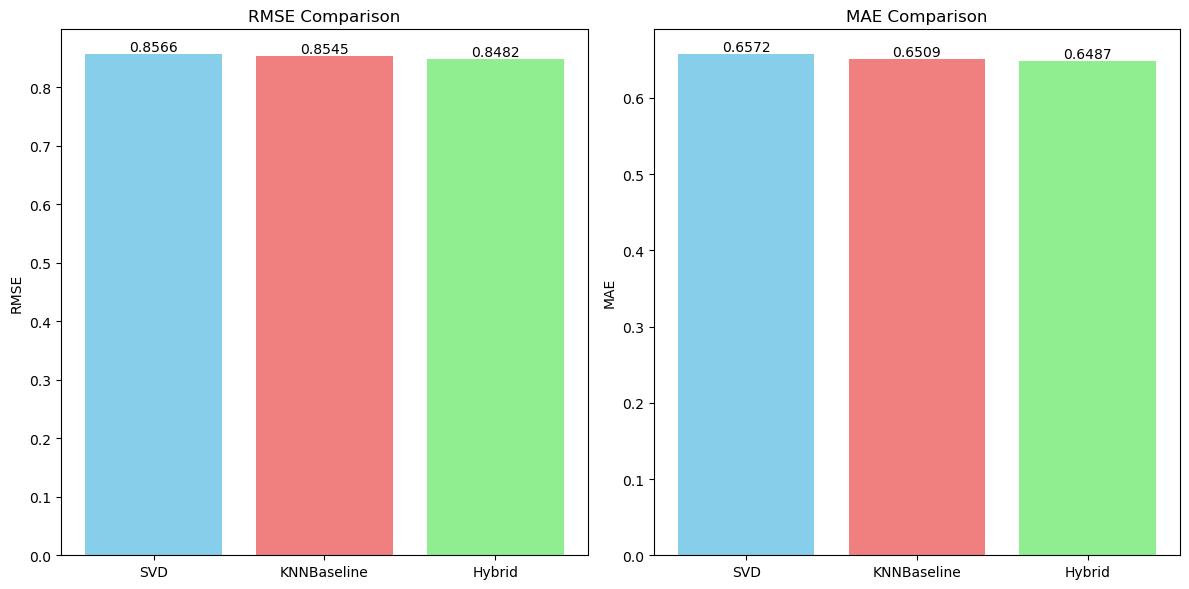

In [30]:
import matplotlib.pyplot as plt
import numpy as np

# Model names
models = ['SVD', 'KNNBaseline', 'Hybrid']

# Performance metrics
rmse = [0.8566, 0.8545, 0.8482]
mae = [0.6572, 0.6509, 0.6487]

# Define different colors for each bar
colors_rmse = ['skyblue', 'lightcoral', 'lightgreen']
colors_mae = ['skyblue', 'lightcoral', 'lightgreen']

# Plot RMSE
plt.figure(figsize=(12, 6))

# RMSE Plot
plt.subplot(1, 2, 1)
bars_rmse = plt.bar(models, rmse, color=colors_rmse)
plt.ylabel('RMSE')
plt.title('RMSE Comparison')

# Add values over each bar in the RMSE plot
for bar in bars_rmse:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, round(yval, 4), va='bottom', ha='center')

# MAE Plot
plt.subplot(1, 2, 2)
bars_mae = plt.bar(models, mae, color=colors_mae)
plt.ylabel('MAE')
plt.title('MAE Comparison')

# Add values over each bar in the MAE plot
for bar in bars_mae:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, round(yval, 4), va='bottom', ha='center')

plt.tight_layout()
plt.show()


In [31]:
import pandas as pd
from surprise import Dataset, Reader, SVD, KNNBaseline
from surprise.model_selection import train_test_split
from surprise import accuracy
import numpy as np

joined_data['user_rating_count'] = joined_data.groupby('userId')['rating'].transform('count')

# Define threshold for many vs few ratings (using median)
rating_threshold = joined_data['user_rating_count'].median()

# Split data into two subsets
many_ratings = joined_data[joined_data['user_rating_count'] > rating_threshold]
few_ratings = joined_data[joined_data['user_rating_count'] <= rating_threshold]

# Function to evaluate model performance
def evaluate_model(data, model, name):
    reader = Reader(rating_scale=(0.5, 5.0))
    dataset = Dataset.load_from_df(data[['userId', 'movieId', 'rating']], reader)
    trainset, testset = train_test_split(dataset, test_size=0.2, random_state=42)
    model.fit(trainset)
    predictions = model.test(testset)
    rmse = accuracy.rmse(predictions)
    mae = accuracy.mae(predictions)
    print(f"{name} - RMSE: {rmse}, MAE: {mae}")
    return rmse, mae

# Initialize models
svd_model = SVD(n_factors=150, n_epochs=60, lr_all=0.01, reg_all=0.2)
knn_model = KNNBaseline(k=60, min_k=5, sim_options={'name': 'pearson', 'user_based': True})

# Evaluate on users with many ratings
print("Users with many ratings:")
svd_rmse_many, svd_mae_many = evaluate_model(many_ratings, svd_model, "SVD")
knn_rmse_many, knn_mae_many = evaluate_model(many_ratings, knn_model, "KNNBaseline")

# Evaluate on users with few ratings
print("\nUsers with few ratings:")
svd_rmse_few, svd_mae_few = evaluate_model(few_ratings, svd_model, "SVD")
knn_rmse_few, knn_mae_few = evaluate_model(few_ratings, knn_model, "KNNBaseline")


Users with many ratings:
RMSE: 0.8392
MAE:  0.6501
SVD - RMSE: 0.8392352930803949, MAE: 0.650059149392708
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8446
MAE:  0.6514
KNNBaseline - RMSE: 0.8446284708478909, MAE: 0.6513626374434296

Users with few ratings:
RMSE: 0.9055
MAE:  0.6897
SVD - RMSE: 0.9054800373478828, MAE: 0.6896812905115123
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9109
MAE:  0.6917
KNNBaseline - RMSE: 0.9108630112908798, MAE: 0.6916928386737972
